# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


## Model and feature selection

Let's load the dataset for this task.

In [2]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline


In [3]:
data_fs = pd.read_csv(r'data/data_fs.csv', low_memory=False)

Look at the first 10 rows of this dataset.

In [4]:
data_fs.head(10)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


The dataset has many NaN's and also a lot of categorical features. So at first, you should preprocess the data. We can deal with categorical features by using one-hot encoding. To do that we can use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [5]:
# fill nan with 0
data_fs = data_fs.fillna(0)

# our goal is to predict the "price_doc" feature.
y = data_fs[["price_doc"]]
X = data_fs.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

# one-hot encoding
X = pd.get_dummies(X, sparse=True)

In [6]:
# Let's split our dataset into train 70 % and test 30% by using sklearn. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Look at first 10 rows what you get.
X_train.head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,"child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",modern_education_share_0,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",old_education_build_share_0,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517"
14065,46,44.0,7.0,25.0,1.0,2015.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
12978,77,48.0,17.0,17.0,4.0,2009.0,3.0,9.0,3.0,1.631523e+07,...,1,0,0,1,0,0,0,1,0,0
18695,39,18.0,7.0,17.0,1.0,0.0,1.0,9.0,0.0,5.293465e+06,...,0,0,0,0,1,0,0,0,1,0
26411,52,52.0,9.0,17.0,1.0,0.0,2.0,1.0,1.0,2.553630e+07,...,0,0,0,0,1,0,0,0,1,0
1419,30,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.641243e+06,...,0,1,1,0,0,0,1,0,0,0
29787,99,0.0,12.0,0.0,1.0,2015.0,4.0,1.0,1.0,4.441296e+06,...,0,0,0,0,0,1,0,0,0,1
18411,40,0.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
11541,31,17.0,1.0,9.0,2.0,1964.0,1.0,6.0,2.0,4.662813e+06,...,1,0,0,1,0,0,0,1,0,0
20741,55,0.0,6.0,0.0,1.0,0.0,2.0,12.0,1.0,6.677245e+07,...,0,0,0,0,1,0,0,0,1,0
13103,58,42.0,7.0,9.0,1.0,1974.0,3.0,6.0,2.0,4.389199e+06,...,1,0,0,1,0,0,0,1,0,0


Okay, now let's see how much data we have.

In [7]:
print("Train size =", X_train.shape)
print("Test size =", X_test.shape)

Train size = (21329, 560)
Test size = (9142, 560)


There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

<br>

But at first, we almost forgot to take a look at our targets. Let's plot `y_train` histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF3D772AC8>]],
      dtype=object)

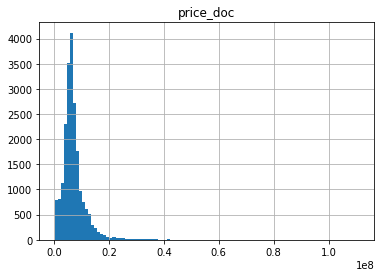

In [8]:
y_train.hist(bins=100)

There is a big variance in it and it's far from being a normal distribution. In the real-world problems it happens all the time: the data can be far from perfect. We can use some tricks to make it more like what we want.
In this particular case we can predict $\log y$ instead of $y$. This transformation is invertible, so we will be able to get our $y$ back.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF3D7DD908>]],
      dtype=object)

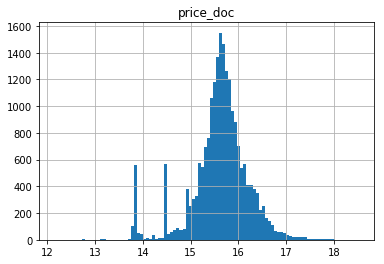

In [9]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)

Now it looks more like the data we want to deal with.

The preprocessing is finally over, so now we are ready for the actual task.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>

If you have difficulties with solving the below problems take a look at seminar $7$ on feature and model selection.

<br>

### Task 1 (1 pt.): Random forest feature importances

Use random forest to find the imortance of features. Plot the histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF3DBA6240>]],
      dtype=object)

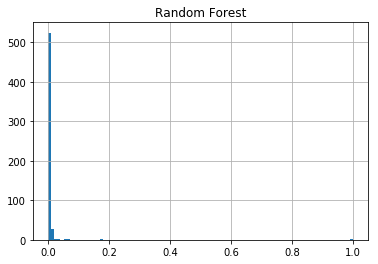

In [10]:
from sklearn.ensemble import RandomForestRegressor 

### BEGIN Solution


from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler


rfr=RandomForestRegressor(random_state=0)

rfr.fit(X_train,y_train)
feauture_names=X_train.columns.values.tolist()
name=np.array(feauture_names)
feature_scores = pd.DataFrame(columns=['Random Forest'], index=name)
scaler = MinMaxScaler()
feature_scores['Random Forest'] = scaler.fit_transform(rfr.feature_importances_.reshape(-1, 1))
feature_scores.hist(bins=100)

### END Solution

Print the 20 most important features and their **values**.

In [11]:
### BEGIN Solution


top_20=feature_scores.sort_values(['Random Forest'], ascending=[False])[0:20]
top_20
### END Solution

,Random Forest
full_sq,1.000000
cafe_count_3000,0.171389
office_sqm_5000,0.064953
cafe_count_2000,0.056654
sport_count_3000,0.039985
ttk_km,0.032301
cafe_count_3000_price_2500,0.025474
zd_vokzaly_avto_km,0.020094
church_count_5000,0.019718
cafe_count_5000_price_2500,0.019319


<br>

### Task 2 (1 pt.)

On these 20 features train each of the following models
* **Linear Regression**
* **Ridge regression**
* **Random forest**
* **DecisionTree**

and test its performance using the **Root Mean Squared Logarithmic Error** (RMSLE).

In [ ]:
from sklearn.metrics import mean_squared_log_error

You will need to do it for the next tasks too, so we recommend you to implement
a dedicated function for comparisons, which
1. on input the function takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`
2. it trains **all of the listed models** on the `(X_train, y_train)` sample
3. it computes and returns a table the RMSLE score of each fitted model on the test dataset`(X_test, y_test)`

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
#create dataset with Top_20 features
top_20=top_20.index.values.tolist()
top_20

X_top_tr=X_train[top_20]
X_top_te=X_test[top_20]
#from sklearn.metrics import root_mean_squared_log_error
def comparator(X_train, y_train, X_test, y_test):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(), 
        "Lasso": linear_model.Lasso(), 
        "Ridge": linear_model.Ridge(),
        "Dtree": sklearn.tree.DecisionTreeRegressor(random_state=42),
        "RFR": sklearn.ensemble.RandomForestRegressor(n_estimators =100,random_state=42)
    }
    error_train=[]
    error_test=[]

### BEGIN Solution
    names={"Linear Regression","Lasso","Ridge","Dtree","RFR"}
    for model in methods.items():
        model=model[1].fit(X_train,y_train)
        y_pred_train=model.predict(X_train)
        y_pred_test=model.predict(X_test)
        
        error_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
        error_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))



### END Solution
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train loss": error_train,
        "Test loss": error_test
    })

Now apply this function

In [13]:
### BEGIN Solution
comparator(X_top_tr, y_train_log, X_top_te, y_test_log)
### END Solution

,Methods,Train loss,Test loss
0,Linear Regression,0.553730,0.538723
1,Lasso,0.571149,0.560081
2,Ridge,0.553730,0.538722
3,Dtree,0.070421,0.643537
4,RFR,0.189632,0.481575


<br>

## Forward-backward methods

The idea is to add or remove features and look how it influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

### Task 3 (2 pt.): Implement forward method with early stopping

Implement the following greedy feature selection algorithm:

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unsued* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

### **<span style="color:red">ATTN</span>**
Use $k=3$ for the $k$-fold cv, because higher values could take a **lo-o-o-o-o-o-o-o-ong** time.

Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is**.

Please look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html).

In the cell below implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model "quality".

In [14]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
 
    my_scorer = make_scorer(mean_squared_error,greater_is_better=False)   
    for i in tqdm(X.columns.values.tolist()):
        if i not in used_features:
            used_features.append(i)
            cva=-cross_val_score(model,X[used_features],y,cv=cv,scoring=my_scorer).mean()
            cva=np.sqrt(cva)
            scores.update({i:cva})
            used_features.pop()


    ### END Solution

    return scores

In [15]:
import operator
def forward_steps(X, y, n_rounds, method):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        method: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    max_score=-np.inf
    round=0
    while round < n_rounds:
        round = round + 1
        
        if len(feat_best_list)==len(X.columns.tolist()):
             break
        
        scores=selection_step(method, X, y, used_features=feat_best_list, cv=3)
        
        score=sorted(scores.items(), key=operator.itemgetter(1))[0]
        feat_best_list.append(score[0])
        
        if score[1]>max_score:
            max_score=score[1]
            round=0
        
        
   


    ### END Solution
    
    return feat_best_list





Use the function implemented above and use DecisionTreeRegressor to get the best features according to this algorithm and print them.

In [16]:
### BEGIN Solution

tree_reg=sklearn.tree.DecisionTreeRegressor()
new_features=forward_steps(X_train, y_train_log, n_rounds=5, method=tree_reg)
new_features

### END Solution

100%|████████████████████████████████████████████████████████████████████████████████| 560/560 [01:15<00:00,  7.41it/s]


['full_sq',
 'ecology_no data',
 'sub_area_Nekrasovka',
 'sub_area_Poselenie Vnukovskoe',
 'sub_area_Poselenie Novofedorovskoe',
 'sub_area_Zapadnoe Degunino']

Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.

In [17]:
X_top_tr=X_train[new_features]
X_top_te=X_test[new_features]
comparator(X_top_tr, y_train_log, X_top_te, y_test_log)

,Methods,Train loss,Test loss
0,Linear Regression,0.566952,0.550654
1,Lasso,0.587802,0.576737
2,Ridge,0.566952,0.550653
3,Dtree,0.485875,0.494966
4,RFR,0.486295,0.493970


<br>

## Boosting: gradient boosting, adaboost


### Practical Boosting

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

### Task 4 (2 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [55]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **Plot the decision boundary** on a $2$-d grid; 
3. Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to seminars $8-9$.

Accuracy score on test data: 0.9583333333333334


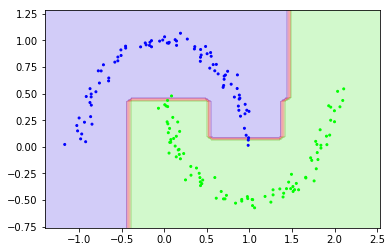

In [57]:
from copy import deepcopy
from scipy.optimize import minimize_scalar

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

def for_plot(a, b):
    return a-abs(a)*0.2,b + abs(b) * 0.2

X_l, X_h = X.min(axis=0), X.max(axis=0)
x0s=np.linspace(*for_plot(X_l[0], X_h[0]), num=51)
x1s=np.linspace(*for_plot(X_l[1], X_h[1]), num=51)

xx0, xx1 = np.meshgrid(x0s,x1s)

X_grid = np.c_[xx0.ravel(), xx1.ravel()]
X_grid.shape

X_l, X_h = X.min(axis=0), X.max(axis=0)


xx0, xx1 = np.meshgrid(x0s,x1s)

X_grid = np.c_[xx0.ravel(), xx1.ravel()]
X_grid.shape


def logistic_loss(y, y_pred):
    return np.sum(np.log(1 + np.exp(-y * y_pred)))
def logistic_loss_residual(y, y_pred):
    return  - y  / (1 + np.exp(-y * y_pred))


    
def my_gradient_boosting(n_estem,X,y,function,logistic_loss,logistic_loss_residual,X_test, grid):
    model=[]
    weights=[]
    gamma_0=0.5
    f=minimize_scalar(lambda y_pred:logistic_loss(y,y_pred),method='golden').x
    
    model.append(f)
    weights.append(gamma_0)
    
    def gradiend_predict(model,weights,moon):
        predict=0
        for i in range(len(model)):
            if i>0:
                predict=predict+weights[i]*model[i].predict(moon)
                
            else:
                predict=predict+weights[i]*np.repeat(model[i],moon.shape[0])
        return predict
    
    for i in range(n_estem):
        predict=gradiend_predict(model,weights,X)
        residual=logistic_loss_residual(y,predict)
        function.fit(X,-residual)
        
        weight_f=lambda gamma_new:logistic_loss(y,predict+gamma_new*function.predict(X))
        
        gamma_new=minimize_scalar(weight_f,method='golden').x
        
        model.append(deepcopy(function))
        weights.append(gamma_new)
        
        
    prediction=np.sign(predict)
    prediction_test=np.sign(gradiend_predict(model,weights,X_test))
    grid_pred = gradiend_predict(model,weights,grid)
    return  prediction_test,np.sign(grid_pred)

regressor_tree = sklearn.tree.DecisionTreeRegressor(max_depth=7)
prediction,grid_pred = my_gradient_boosting(10, X_train, y_train, regressor_tree, logistic_loss,logistic_loss_residual,X_test,grid=X_grid)
grid_pred=grid_pred.reshape(xx0.shape)


plt.contourf(xx0, xx1, grid_pred, cmap=plt.cm.brg,alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=4,cmap=plt.cm.brg)
print('Accuracy score on test data:',accuracy_score(prediction,y_test))

<br/> <!--Intentionally left blank-->

### Task 5 (1 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

In [50]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from xgboost.sklearn import XGBClassifier
import lightgbm 

Learning rate set to 0.5
0:	learn: 0.3054591	total: 103ms	remaining: 620ms
1:	learn: 0.1674515	total: 197ms	remaining: 493ms
2:	learn: 0.1178830	total: 291ms	remaining: 388ms
3:	learn: 0.1039375	total: 372ms	remaining: 279ms
4:	learn: 0.0988714	total: 456ms	remaining: 182ms
5:	learn: 0.0765830	total: 536ms	remaining: 89.3ms
6:	learn: 0.0535176	total: 622ms	remaining: 0us


,Time for Deafault params
catboost,153.558674
XGBoost,0.138923
lightgbm,0.475124


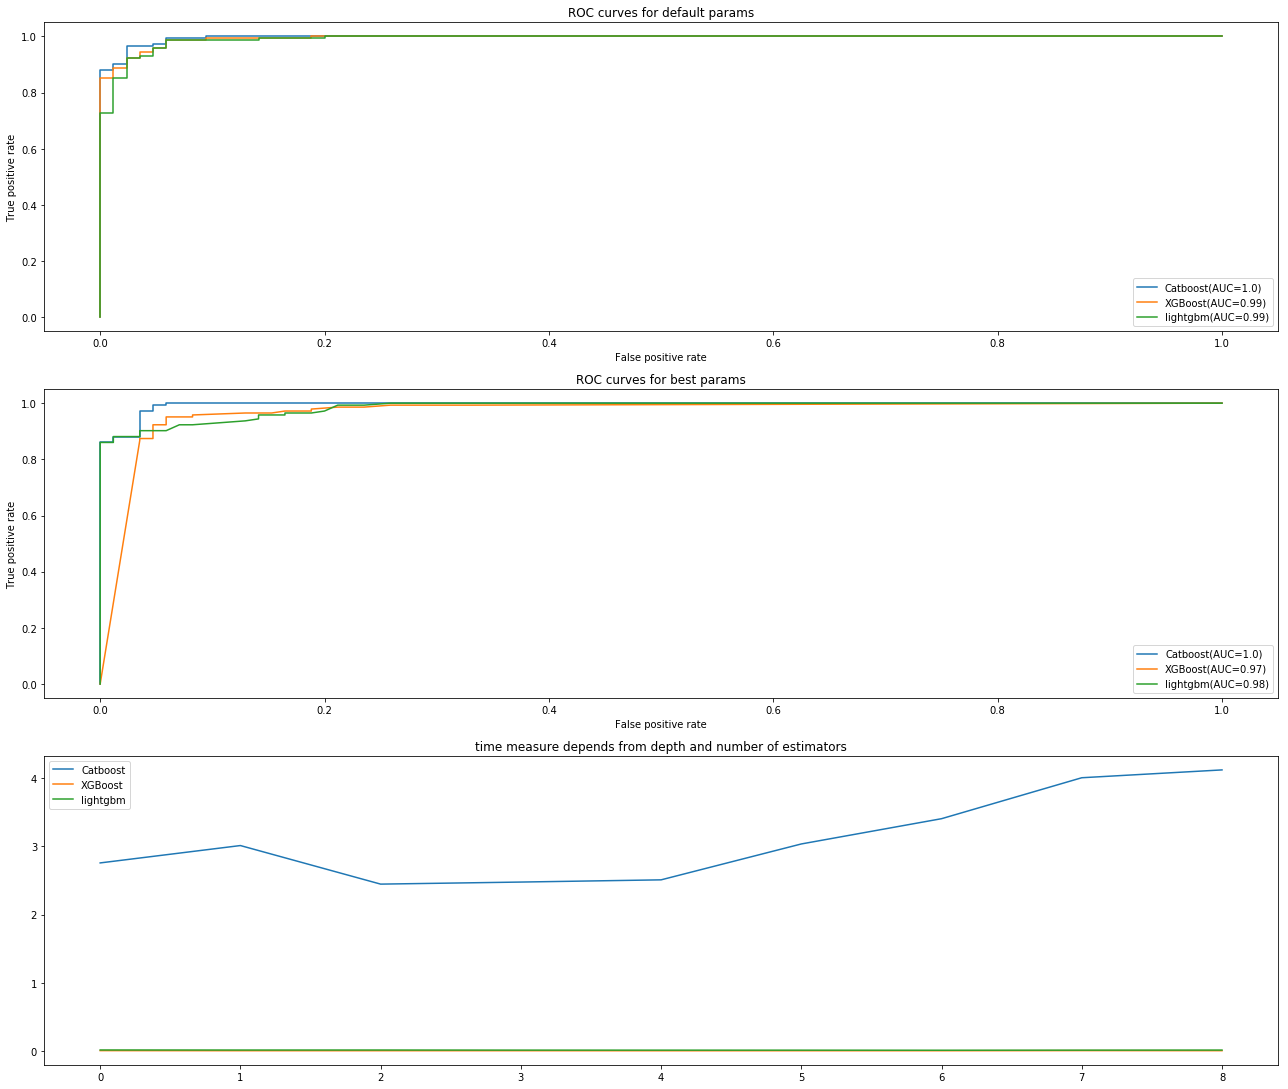

In [53]:
from sklearn.metrics import roc_auc_score
from time import time
models=[CatBoostClassifier(verbose=0),XGBClassifier(random_state=42),lightgbm.LGBMClassifier(random_state=42)]
#models=[XGBClassifier(random_state=42),lightgbm.LGBMClassifier(random_state=42)]

plt.figure(figsize=(18,15))


labels=('Catboost','XGBoost','lightgbm')


Time=[]
for model,lab in zip(models,labels):


    time_begin=time()
    
    model.fit(X_train, y_train)
    
    time_end=time()
    Times = time_end - time_begin
    Time.append(Times)
    
    auc=roc_auc_score(y_test,model.predict_proba(X_test)[:,1]).round(2)
    
    #print(lab,Time)
    #Time[0][model]=time
    
    
    


    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    label=lab+'(AUC={})'.format(auc)
    
    plt.subplot(311)
    
    plt.plot(fpr, tpr,  label=label)

    plt.legend()
    plt.title('ROC curves for default params')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

    

new_models=[CatBoostClassifier,XGBClassifier,lightgbm.LGBMClassifier]

#new_models=[XGBClassifier,lightgbm.LGBMClassifier]
time_diff_depth=[]

for clf,lab,method in zip(models,labels,new_models):
    param_grid={'n_estimators': np.arange(1,8),'max_depth':np.arange(1,10,1)}
    model=GridSearchCV(estimator=clf,param_grid=param_grid,cv=3,n_jobs=-1)
    model.fit(X_train,y_train)
    param=model.best_params_
    time_cv=model.cv_results_['mean_fit_time'].round(4)
    time_diff_depth.append(time_cv)
    
    
    cl=method(n_estimators=param['n_estimators'],max_depth=param['max_depth'])
   
    
    cl.fit(X_train,y_train)


    
    auc=roc_auc_score(y_test,cl.predict_proba(X_test)[:,1]).round(2)
    fpr, tpr, _ = roc_curve(y_test, cl.predict_proba(X_test)[:, 1])
    label=lab+'(AUC={})'.format(auc)
   
    plt.subplot(312)
    
    plt.plot(fpr, tpr,  label=label)

    plt.legend()
    plt.title('ROC curves for best params')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
    
  

    
    
plt.tight_layout()    


time=[time_diff_depth[0].reshape(7,9), time_diff_depth[1].reshape(7,9),time_diff_depth[2].reshape(7,9)]

x=(0,1,2)
for i,lab in zip(x,labels): 
    plt.subplot(313)
    plt.plot(time[i].mean(axis = 0),label=lab)
    plt.legend() 
    plt.title('time measure depends from depth and number of estimators')


columns=Time

columns = ['Time for Deafault params']
rows = ['catboost','XGBoost', 'lightgbm']
Time_df = pd.DataFrame(Time,columns=columns,index=rows)
Time_df

<br>

## NNs

### Task 6 (1 pt.): Activation functions
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality:
* ReLU, ELU ($\alpha = 1$), Softplus ($\beta = 1$);
* Sign, Sigmoid, Softsign, Tanh.

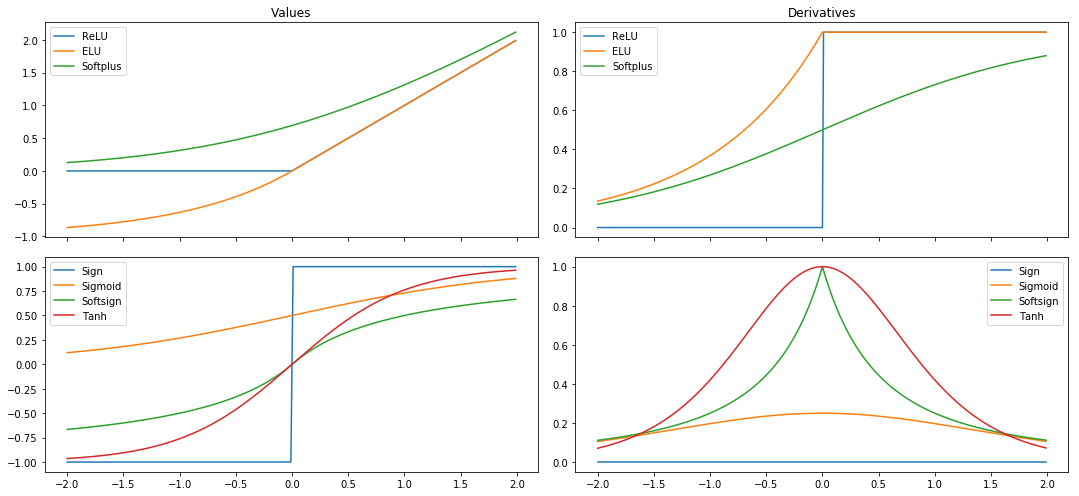

In [54]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch


x = torch.arange(-2, 2, .01, requires_grad=True)
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 7))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
       
        axes[i,0].plot(x.detach().numpy(),activation(x).detach().numpy(),label=function_name)
        x.grad.data.zero_()
        activation(x).backward(torch.ones(len(x.detach().numpy())))
        
        
        axes[i,1].plot(x.detach().numpy(),(x.grad.data.detach()).numpy(), label=function_name)
       

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Answer the following questions. Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

### Task 7 (3 pt.): Backpropagation
At the seminar 10 on neural networks, we built an MLP with one hidden layer using our numpy implementations of linear layer and logistic and softmax activation functions. Your task is to
1. implement backpropagation for these modules,
2. train our numpy realization of MLP to classify the toy MNIST from `sklearn.datasets`.

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Prepare the dataset.

In [59]:
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

Implement the MLP with backprop.

In [194]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty_like(self.thetas)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty_like(self.bias)
        self.x=None
        self.output=None


    def forward(self, x): 
        output = np.matmul(x, self.thetas) + self.bias
        self.x=x
        self.output=output
        return output
    

    def backward(self, x, output_grad):
          # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        # compute gradient w.r.t. weights and biases
        self.x=self.x.reshape(-1,1)
        input_grad=np.matmul(self.thetas,output_grad)
        
        #assert grad_thetas.shape == self.weights.shape and grad_biases.shape == self.biases.shape       
        # Here we perform a stochastic gradient descent step. 
#         self.weights = self.weights - self.learning_rate * grad_weights
#         self.biases = self.biases - self.learning_rate * grad_biases    
        
        # ... calculate grads
        self.thetas_grads += np.outer(self.x,output_grad.T)
        self.bias_grads += output_grad.sum(axis=1)
        ### END Solution
        return input_grad


class LogisticActivation:
    
    def __init__(self):
        
        self.x=None
        self.output=None
     
            
    def forward(self, x):
        output = 1/(1 + np.exp(-x))
        self.x=x
        self.output=output
        print(self.output)
        return output



    def backward(self, x, output_grad):
        ### BEGIN Solution
        input_grad=output_grad*self.output.reshape(-1,1)*(1-self.output.reshape(-1,1))
        
        
       # input_grad=output_grad*output_grad.reshape(-1,1)
        
        # ... calculate grads
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    
    def __init__(self):
        
        self.x=None
        self.output=None
    
            
            
    def forward(self, x):
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        self.output=output
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        
       # input_grad=output_grad*self.output.reshape(-1,1)
        input_grad=output_grad*self.output.reshape(-1,1)*(1.-self.output.reshape(-1,1))
        ### END Solution
        return input_grad
    

class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        self.softmax=SoftMaxActivation()
        
    
    def forward(self, x):
        return self.softmax.forward(self.linear2.forward(self.activation1.forward(self.linear1.forward(x))))


    def backward(self, x, output_grad):
#         ### BEGIN Solution
#         first=x
#         s=self.linear1.forward(first)
#         thta=self.activation1.forward(s)                
        
        first_step = self.linear2.backward(x, output_grad)
        second_step = self.activation1.backward(x, first_step)
        third_step = self.linear1.backward(x, second_step)
 
        # ... calculate and update grads
        ### END Solution

In [167]:
def cross_entropy_loss(predict,true):
    TV=np.zeros_like(predict)
    TV[true]=1
    return -np.sum(TV * np.log2(predict))
        

def cross_entropy_loss_grad(predict,true):
    TV=np.zeros_like(predict)
    TV[true]=1
    return(predict-TV).reshape(-1, 1)
    


In [195]:
### BEGIN Solution
# Please, implement here everything else you need, like the loss function.
### END Solution

def cross_entropy_loss(predicted, target):
    target_vector = np.zeros_like(predicted)
    
    if (predicted.ndim != 1):
        target_vector[np.arange(len(target)), target] = 1
        cost = -np.sum(target_vector * np.log2(predicted), axis=1)
    else:
        target_vector[target] = 1
        cost = -np.sum(target_vector * np.log2(predicted))
    
    return cost

def grad_cross_entropy_loss(predicted, target):
    target_vector = np.zeros_like(predicted)
    target_vector[target] = 1    
    return (predicted - target_vector).reshape(-1, 1)

In [196]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 200
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-3

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch), end=' ')
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]

        ### BEGIN Solution
        
        # ... zero the gradients
        mlp.linear1.thetas_grads=np.zeros_like(mlp.linear1.thetas_grads)
        mlp.linear2.thetas_grads=np.zeros_like(mlp.linear2.thetas_grads)
        
        mlp.linear1.bias_grads=np.zeros_like(mlp.linear1.bias_grads)
        mlp.linear2.bias_grads=np.zeros_like(mlp.linear2.bias_grads)
        
        # prediction = mlp.forward(x)
        prediction=mlp.forward(x)
        # loss = # use cross entropy loss
        Loss=cross_entropy_loss(prediction,target)
        Loss_gradient=cross_entropy_loss_grad(prediction,target)
        # learning_curve[epoch] += los
        learning_curve[epoch]+=Loss
        # ... perform backward pass
        backward_pass=mlp.backward(x,Loss_gradient)
        # ... update the weights simply with weight -= grad * learning_rate
        mlp.linear1.thetas -=mlp.linear1.thetas_grads*learning_rate
        mlp.linear2.thetas -=mlp.linear2.thetas_grads*learning_rate
        
        mlp.linear1.bias -=mlp.linear1.bias_grads*learning_rate
        mlp.linear2.bias -=mlp.linear2.bias_grads*learning_rate
    
    learning_curve[epoch] /= train_size
    prediction = mlp.forward(x_test)
    # loss = # use cross entropy loss
    Loss=cross_entropy_loss(prediction,y_test).mean()
    # test_curve[epoch] = loss
    test_curve[epoch]=Loss
    ### END Solution


plt.plot(learning_curve)
plt.plot(test_curve)

Starting epoch 0 [0.38552493 0.07300145 0.70411199 0.46285171 0.88276916 0.70080925
 0.55724642 0.16401655 0.35641578 0.33597751 0.86150522 0.36662028
 0.20472231 0.67388853 0.67014902 0.39108949 0.74299292 0.50724728
 0.23372225 0.89163399 0.14173357 0.49512258 0.81193111 0.83260862
 0.26269234 0.49684292 0.29446463 0.86990587 0.7197431  0.38367399
 0.59721345 0.21742957 0.20852603 0.59681064 0.7969959  0.46164402
 0.62999149 0.21551319 0.8634319  0.68452244 0.78686058 0.84583206
 0.44912005 0.45616109 0.17898706 0.42472729 0.70265928 0.73588976
 0.52837078 0.47337139 0.6635053  0.62379006 0.45433995 0.56107735
 0.62387633 0.23440786 0.03451812 0.58976614 0.3760512  0.70333451
 0.66029969 0.45246854 0.89471413 0.63838909 0.31533824 0.82813894
 0.20898599 0.08512066 0.31047603 0.81287054 0.59572646 0.38708517
 0.69956743 0.25695488 0.26790906 0.39237154 0.40043158 0.22580525
 0.34316476 0.81659252 0.43424412 0.32565729 0.26926461 0.35712552
 0.63531953 0.48862129 0.79829635 0.33302439 

 0.38442327 0.56282426 0.31145184 0.30215246]
[0.38979594 0.07553154 0.72533939 0.44770441 0.88948092 0.66805028
 0.48182227 0.15714762 0.29867633 0.32916848 0.87795737 0.38222563
 0.18720381 0.61997394 0.66649878 0.40336584 0.75438941 0.55981064
 0.21446513 0.90726803 0.13314966 0.38840701 0.79479556 0.82310767
 0.30175909 0.42941714 0.30289661 0.84786535 0.63973276 0.38801333
 0.56099847 0.15979825 0.24489141 0.56776398 0.74053093 0.40101059
 0.6346674  0.33835128 0.85565846 0.73634941 0.79753462 0.80852911
 0.4694728  0.44766958 0.11346096 0.44400711 0.69456601 0.70688865
 0.57844587 0.48693747 0.61931703 0.61484829 0.37367129 0.62448814
 0.65497789 0.24416052 0.03193681 0.63242917 0.24053934 0.67410708
 0.67534124 0.51287808 0.8478609  0.61923917 0.38518629 0.82025202
 0.219946   0.08257693 0.34457586 0.80309323 0.5682479  0.36270405
 0.70099508 0.26932599 0.28828427 0.40318683 0.39305812 0.216474
 0.37174312 0.8392209  0.42218567 0.28133924 0.24229569 0.38823667
 0.63530679 0.5701

 0.35763607 0.55289721 0.30365065 0.32723709]
[0.33702975 0.0749481  0.66044678 0.43595891 0.88321007 0.69060049
 0.52153354 0.17779916 0.30785416 0.28760631 0.88236954 0.33100408
 0.18899566 0.62833714 0.68691644 0.35613561 0.75809263 0.44653999
 0.23637922 0.90015252 0.124735   0.43756619 0.76780609 0.84998708
 0.24796344 0.48303712 0.30122242 0.85565907 0.69020443 0.49046056
 0.60041088 0.15400995 0.17396501 0.60450516 0.78879298 0.45986559
 0.59026832 0.24212669 0.8749512  0.66707585 0.81150591 0.85592604
 0.39781792 0.500999   0.15963861 0.44136161 0.7309391  0.75469954
 0.47324544 0.43663225 0.59753681 0.62520813 0.39631159 0.5621265
 0.6062319  0.23275691 0.04370116 0.58205681 0.31555298 0.78564584
 0.71761701 0.48388703 0.85617212 0.6878431  0.33092743 0.79576933
 0.20927167 0.08821557 0.3233413  0.80260533 0.60579048 0.37761031
 0.71856584 0.27825363 0.27337461 0.34356469 0.38706004 0.2424607
 0.40772857 0.82493565 0.39168739 0.299793   0.28024834 0.37480688
 0.60565012 0.5230

 0.36923983 0.50352691 0.2864009  0.30484622]
[0.37114525 0.07171368 0.70026205 0.40954792 0.9023495  0.65634258
 0.4843376  0.20792605 0.27674495 0.2836793  0.88041314 0.335527
 0.17755795 0.6756173  0.75148019 0.33346069 0.74276352 0.51331393
 0.20536126 0.90840836 0.12953736 0.44829412 0.82560478 0.86956983
 0.2949207  0.48501547 0.33631337 0.85559745 0.73498498 0.41016902
 0.59794891 0.15007052 0.19005161 0.62312633 0.81656591 0.3890236
 0.65287882 0.26507246 0.86562849 0.66498398 0.81883632 0.86136829
 0.43589695 0.44704676 0.124684   0.45358384 0.71658051 0.76075934
 0.49483442 0.47384203 0.62635784 0.63093425 0.33942306 0.52456821
 0.58417453 0.22527792 0.05148019 0.66047884 0.32858525 0.77158472
 0.58268613 0.59372524 0.87999469 0.64569236 0.39092877 0.82465037
 0.24396469 0.08747184 0.36188794 0.78575824 0.52287272 0.46058848
 0.72460463 0.2500593  0.25796322 0.35595788 0.40581615 0.25103614
 0.39178839 0.77748715 0.48450367 0.33552473 0.32904619 0.4306534
 0.55999854 0.498215

 0.43471743 0.57799611 0.37299186 0.3144624 ]
[0.41483649 0.08360986 0.67999971 0.46407628 0.88463899 0.65111429
 0.53093763 0.18945967 0.30470059 0.25511284 0.86387983 0.36898524
 0.18165123 0.65249521 0.70971799 0.35202178 0.69957081 0.49579821
 0.26008573 0.87861815 0.13635821 0.39769335 0.80057558 0.83942756
 0.29797637 0.43903567 0.33395313 0.82059186 0.66407543 0.43907689
 0.6115004  0.1653656  0.22965778 0.56046996 0.73939978 0.42164052
 0.58555484 0.2543092  0.8361939  0.65953442 0.81162083 0.86822174
 0.44895046 0.43478432 0.12193394 0.44462547 0.67605669 0.74598621
 0.53677845 0.50186378 0.65253429 0.62717468 0.39090407 0.57732226
 0.5757986  0.21786656 0.05034328 0.61479906 0.27013869 0.75660408
 0.61512701 0.39360501 0.85162928 0.6988233  0.3436201  0.81452497
 0.24412428 0.06766978 0.35579332 0.78642054 0.57593209 0.47778484
 0.66320676 0.23316101 0.26659315 0.36897335 0.37235482 0.24693998
 0.39339398 0.82154175 0.45308083 0.2962915  0.30885826 0.39804354
 0.56572134 0.55

 0.38329568 0.5372962  0.33240801 0.2860051 ]
[0.37456985 0.07144872 0.66693956 0.45915999 0.88466152 0.65422942
 0.47621928 0.18771308 0.33464688 0.2923126  0.88216772 0.42159
 0.16715409 0.66913992 0.68870955 0.37460532 0.66119211 0.54162571
 0.26547501 0.89875945 0.14077447 0.34181322 0.80083879 0.83154008
 0.29188201 0.4418903  0.31295927 0.83030876 0.63850251 0.41430994
 0.59677774 0.19486594 0.25520884 0.557544   0.7230651  0.40081313
 0.59116949 0.28238689 0.83450987 0.72044299 0.80784847 0.83300303
 0.43231097 0.39448277 0.11273726 0.48284838 0.68777794 0.71853206
 0.52943342 0.51821326 0.63052021 0.66027443 0.33375638 0.63485908
 0.5938848  0.21124308 0.04353223 0.56161162 0.25984283 0.74498467
 0.64029787 0.45879503 0.86021249 0.6845902  0.31357336 0.79569026
 0.20571155 0.07215109 0.34559434 0.79264137 0.63959149 0.42660846
 0.69330916 0.2432353  0.27824424 0.41264639 0.3950094  0.24499962
 0.38562171 0.82150867 0.42029945 0.32102813 0.24417703 0.34328356
 0.6321518  0.52550

 0.34744533 0.52944397 0.27468275 0.28085883]
[0.40490949 0.08970451 0.71630225 0.42090785 0.87678567 0.66640447
 0.49482313 0.16408026 0.25806334 0.25851612 0.86264294 0.3885668
 0.17609115 0.62624487 0.70435059 0.29767907 0.72809789 0.49674772
 0.28538225 0.89078109 0.16245932 0.35619881 0.80801802 0.817044
 0.34126941 0.41127    0.34710974 0.84778535 0.68238433 0.39382815
 0.57909219 0.16763564 0.21846742 0.59190316 0.72116436 0.4221178
 0.60623972 0.26087532 0.833676   0.67852928 0.79180881 0.87041234
 0.473136   0.46871593 0.11390822 0.48428113 0.70653208 0.72462326
 0.52639277 0.52110533 0.63020935 0.63068315 0.34849292 0.60874239
 0.60116497 0.21607237 0.0365703  0.63288758 0.25621992 0.78098761
 0.60404802 0.42996996 0.84337892 0.66140941 0.33369878 0.82396277
 0.26992081 0.08508904 0.3686106  0.778739   0.53314099 0.4245831
 0.70989015 0.22831641 0.25596657 0.38257317 0.43167372 0.23877795
 0.34518866 0.84727407 0.41640868 0.31750522 0.25087275 0.38519594
 0.58058143 0.4831309

 0.34828229 0.49118396 0.299962   0.26202841]
[0.41074629 0.07184752 0.69250606 0.49251261 0.89818526 0.64034715
 0.47296264 0.15644035 0.31506282 0.32444668 0.86628233 0.41829399
 0.16620021 0.67640005 0.65578322 0.35721869 0.71454663 0.5466757
 0.24104229 0.90332526 0.14937363 0.37571608 0.80054215 0.80903379
 0.277888   0.44784624 0.32102205 0.82239088 0.64773252 0.44499377
 0.6159731  0.18148086 0.26825693 0.52418137 0.71636284 0.41837856
 0.63723635 0.2668902  0.84750879 0.67569226 0.83754874 0.82735524
 0.46272771 0.40231352 0.10625238 0.43706765 0.67885332 0.70477524
 0.56082664 0.47947923 0.63349924 0.63985202 0.35113502 0.62019399
 0.56313144 0.21417446 0.03881553 0.60545458 0.23138653 0.73361994
 0.5914935  0.41441926 0.8712954  0.69521667 0.33343984 0.81144784
 0.21334816 0.05640483 0.35010615 0.78947612 0.60761606 0.42215281
 0.65960155 0.23845734 0.27660982 0.41401455 0.39537227 0.25817496
 0.37881341 0.8240088  0.40352732 0.29959963 0.26058217 0.35624263
 0.59784428 0.557

 0.41068223 0.53026526 0.33598337 0.27624811]
[0.37178534 0.06735097 0.68392801 0.46454142 0.89768396 0.66996991
 0.53954607 0.16404494 0.32733001 0.27012588 0.87032449 0.38002754
 0.1913409  0.67974831 0.69494659 0.36967622 0.73036637 0.55611718
 0.2799583  0.89885173 0.14818794 0.4274607  0.80230053 0.83353464
 0.30040045 0.47064906 0.32484077 0.84576988 0.68366206 0.44085977
 0.62530158 0.18539344 0.20146377 0.57625924 0.78324614 0.41162195
 0.64278892 0.24147298 0.84822376 0.69351236 0.82865143 0.84700579
 0.45030299 0.45151563 0.12343132 0.44547438 0.68237013 0.76694892
 0.50527192 0.48648582 0.62376231 0.5888737  0.34464789 0.61309154
 0.53833039 0.21436562 0.04451717 0.6063939  0.29590354 0.76413376
 0.59487902 0.46610096 0.8640116  0.69498782 0.34587464 0.78314604
 0.19437413 0.07142477 0.33757373 0.80650003 0.59388659 0.45145638
 0.68251661 0.25086278 0.29949754 0.39342476 0.38499057 0.25806853
 0.34465858 0.80821029 0.42764176 0.32570073 0.24688759 0.36397299
 0.60364188 0.49

 0.34452319 0.50168235 0.29342639 0.26931385]
[0.39514479 0.07747809 0.69890124 0.4837344  0.89429154 0.65758015
 0.45469111 0.15219828 0.27781005 0.31386609 0.8616267  0.42029833
 0.15232775 0.68575129 0.66068453 0.33877696 0.69280077 0.50771795
 0.24832248 0.90538109 0.14699135 0.40188189 0.79223236 0.82115603
 0.28899453 0.45670494 0.3249514  0.80780497 0.66841013 0.46006655
 0.58781243 0.17956734 0.28156373 0.53376758 0.72827136 0.43208647
 0.64461631 0.25629578 0.83762917 0.6531362  0.82797548 0.81963686
 0.48227298 0.42212064 0.11062846 0.38509207 0.68020299 0.68081163
 0.58121276 0.4496291  0.64470574 0.66423575 0.39843686 0.59663937
 0.56748096 0.23078544 0.04181671 0.60442043 0.24644944 0.71336528
 0.60836236 0.42178602 0.86679735 0.67011888 0.31987543 0.82750784
 0.23896813 0.04890667 0.35724443 0.80708202 0.59063578 0.41399147
 0.6423634  0.25544722 0.27640521 0.41701772 0.42815054 0.25098641
 0.36572673 0.81473559 0.41179475 0.29736297 0.23755444 0.36495796
 0.59461762 0.60

 0.38622472 0.53432876 0.33212116 0.27795326]
[0.44359728 0.09994485 0.67659353 0.49154432 0.90198466 0.64402708
 0.51183201 0.20520524 0.32582561 0.25781479 0.83793919 0.38682227
 0.18604615 0.69513309 0.76017594 0.32627304 0.74362052 0.50570408
 0.27357539 0.8870481  0.14961044 0.45405692 0.8051365  0.84718359
 0.3247164  0.48988807 0.31455648 0.85992281 0.73896178 0.3767829
 0.61990367 0.1850609  0.2075316  0.54969311 0.79114181 0.41290688
 0.63614196 0.20420151 0.86732831 0.64709326 0.81578057 0.8633859
 0.45643608 0.43496978 0.11867953 0.4476047  0.69518406 0.71366161
 0.53447368 0.53713375 0.69639539 0.56280122 0.39477906 0.56210917
 0.52336449 0.21866749 0.05859563 0.6139678  0.34803465 0.77990084
 0.54846283 0.44494416 0.89798366 0.6474682  0.3229654  0.78423675
 0.24091533 0.06666778 0.33572434 0.76515034 0.58528862 0.4208957
 0.65908295 0.21442066 0.26823443 0.3630804  0.44532569 0.2785826
 0.34510794 0.77905856 0.48868045 0.37901148 0.26310892 0.38540858
 0.57163482 0.486783

 0.36277385 0.54622445 0.33025611 0.29373861]
[0.40869789 0.07873328 0.68866974 0.45274141 0.88337158 0.70340407
 0.57511423 0.18452808 0.34818943 0.30369604 0.87142662 0.35823542
 0.21725545 0.66061441 0.69602344 0.41200942 0.72998065 0.52658745
 0.24522552 0.87744494 0.14478526 0.46354996 0.80517592 0.8469897
 0.27078228 0.45057068 0.31031682 0.87335576 0.66841929 0.40959329
 0.61458092 0.20122432 0.16666194 0.59628128 0.78774271 0.44698877
 0.61453821 0.21942019 0.86786774 0.71378005 0.7960994  0.85060385
 0.41833364 0.46019861 0.15340978 0.47483982 0.70624433 0.76254553
 0.49702677 0.45070377 0.65996032 0.56574729 0.39684301 0.58127206
 0.59844872 0.22035749 0.03946672 0.61602302 0.33669057 0.75938398
 0.69577872 0.47716884 0.87947878 0.66203463 0.36255246 0.81301475
 0.21200671 0.08396976 0.33181787 0.78069976 0.59566239 0.40983769
 0.70172491 0.25238978 0.24976988 0.36842626 0.38853903 0.24397197
 0.38141685 0.8433986  0.42428275 0.28631103 0.29355955 0.34942246
 0.6427252  0.494

 0.41111271 0.5859708  0.33014689 0.28882937]
[0.42690623 0.08269429 0.70251972 0.4732467  0.90066071 0.65585333
 0.47740175 0.15095686 0.27248046 0.30027077 0.85166063 0.40757255
 0.17983937 0.66550252 0.66479856 0.34864641 0.74334406 0.52294013
 0.23251786 0.90497735 0.14686481 0.42593282 0.79580764 0.82674417
 0.28809664 0.4456411  0.32721602 0.85550138 0.71834946 0.43303042
 0.57480053 0.17647493 0.24835952 0.51307857 0.74696499 0.43649253
 0.65006309 0.24110684 0.85678715 0.66705934 0.83631236 0.81658279
 0.45933738 0.44590648 0.10988138 0.42706371 0.70084282 0.64785168
 0.53984335 0.46881516 0.64131133 0.61355055 0.38846455 0.60982331
 0.57980987 0.22777629 0.04193816 0.59179621 0.28074008 0.74240134
 0.58714068 0.44416244 0.88103699 0.6354156  0.34689971 0.82479165
 0.22238647 0.05450463 0.30694375 0.80934297 0.6100357  0.39008204
 0.66116203 0.2464279  0.28078742 0.40956219 0.41668482 0.21863588
 0.35081379 0.82261293 0.40084737 0.31043264 0.22072716 0.39597899
 0.59978881 0.56

 0.39841109 0.51818052 0.32727024 0.28261125]
[0.40601234 0.08437713 0.68760687 0.44002602 0.88308296 0.65722527
 0.53265056 0.18669523 0.29384685 0.26137756 0.8712571  0.3484432
 0.1999734  0.67870291 0.70478208 0.3321288  0.72652503 0.4738056
 0.24041297 0.8762363  0.14487821 0.36734867 0.83257997 0.84137493
 0.32804728 0.42623416 0.30467083 0.84017097 0.65856871 0.40474656
 0.59627679 0.17609682 0.20817037 0.59536391 0.74757284 0.43856393
 0.61539069 0.26259277 0.84913845 0.64922884 0.8047937  0.87625386
 0.46072092 0.45233986 0.1098311  0.46418398 0.67595079 0.77781291
 0.48853528 0.50581486 0.63167811 0.57995238 0.34766412 0.58364402
 0.59272841 0.20632325 0.04680738 0.64577273 0.27317166 0.77864649
 0.64449815 0.41574683 0.8533414  0.68350284 0.38014109 0.79174891
 0.25880549 0.09053596 0.36404894 0.78854153 0.59809792 0.43802048
 0.68861003 0.20636382 0.24904713 0.37741331 0.41202742 0.24595763
 0.35814721 0.83895299 0.42166378 0.28939251 0.27447385 0.36766101
 0.5762633  0.5382

 0.3864412  0.51923962 0.34388325 0.31493697]
[0.43317837 0.09161297 0.69481744 0.49595282 0.87755591 0.67301612
 0.4797203  0.15286473 0.28678982 0.31239998 0.84234464 0.39201745
 0.17679417 0.69351403 0.75573752 0.38736202 0.76588739 0.52043757
 0.27768051 0.89700741 0.11920965 0.44680097 0.81131594 0.85977268
 0.29465862 0.40857582 0.32737413 0.83579563 0.70188065 0.45184
 0.566884   0.14069234 0.20129844 0.56956897 0.76363073 0.4413881
 0.66115742 0.23720842 0.88494323 0.66660808 0.82948219 0.84006826
 0.42385801 0.48287125 0.1003884  0.39755665 0.71270681 0.73271841
 0.54430631 0.48325556 0.64818902 0.57927386 0.3978085  0.52313223
 0.5572327  0.2790428  0.05620984 0.63248276 0.26125462 0.78226948
 0.60034799 0.49239827 0.85736608 0.62776168 0.37103027 0.82565016
 0.2638519  0.06070979 0.3463903  0.78319436 0.54671285 0.34777856
 0.64158933 0.21483795 0.27205809 0.35282956 0.46343573 0.24357494
 0.34005793 0.83250178 0.43964267 0.2997955  0.23565583 0.38899793
 0.61694631 0.533358

 0.38958818 0.53248537 0.33639848 0.28716956]
[0.40094424 0.07625453 0.70931727 0.44872024 0.90130465 0.66640551
 0.52789534 0.17384557 0.30181391 0.28771653 0.87075489 0.35935521
 0.21253394 0.63303052 0.66838499 0.39049656 0.74742326 0.51299588
 0.24215301 0.9007778  0.1683666  0.46173587 0.77427948 0.82921358
 0.27023634 0.4837853  0.30981754 0.85433578 0.7182583  0.41611976
 0.58319943 0.17587169 0.20204539 0.53156267 0.77976411 0.38291434
 0.653773   0.24791995 0.85211665 0.66993688 0.82262871 0.82444861
 0.45227016 0.48045213 0.14004479 0.40451738 0.71471613 0.71090983
 0.52191936 0.43630463 0.63559598 0.58953977 0.40364173 0.59798352
 0.61531715 0.21595132 0.03936398 0.6434631  0.33431904 0.71931864
 0.62205028 0.49294586 0.87848168 0.67582713 0.37753474 0.81471311
 0.22457487 0.06284597 0.33446995 0.78954402 0.56158751 0.40806366
 0.69990468 0.27830311 0.27587413 0.38810394 0.40254333 0.24464734
 0.37265118 0.81393969 0.46269172 0.30984323 0.28467799 0.39187552
 0.58630619 0.55

 0.37213822 0.57851657 0.31476014 0.30165364]
[0.38035723 0.07625718 0.69755734 0.45079582 0.86165788 0.6541194
 0.48351369 0.17040797 0.26870245 0.31904173 0.86071791 0.35597438
 0.18986058 0.65106117 0.70158894 0.39111328 0.78035039 0.49737409
 0.24763402 0.8926955  0.13290385 0.43508849 0.78001665 0.84252824
 0.28349768 0.42893598 0.31345939 0.85341025 0.70251453 0.40909807
 0.55463905 0.14721854 0.1785837  0.57643428 0.75252763 0.42940857
 0.64474058 0.26934654 0.88445656 0.68277218 0.83220692 0.83977445
 0.4442871  0.48195765 0.12536905 0.4848987  0.73801441 0.67289828
 0.5212394  0.45736896 0.65497677 0.56257693 0.42505742 0.58938913
 0.62439712 0.2316326  0.04676016 0.61930228 0.29336483 0.73083021
 0.65932657 0.48454361 0.85527923 0.63722226 0.3801635  0.79841648
 0.22248333 0.07513796 0.33276902 0.80676798 0.56794014 0.31734127
 0.67871626 0.24604919 0.27102476 0.32185186 0.36273827 0.23715325
 0.36016787 0.81740998 0.41522944 0.29103639 0.2917843  0.43290768
 0.61201232 0.511

 0.42305362 0.55936599 0.3048387  0.29471195]
[0.37413877 0.07138955 0.71712264 0.45614551 0.86594841 0.67180065
 0.47418386 0.18625941 0.27982638 0.33131837 0.87486148 0.35851974
 0.19158917 0.67947155 0.69567251 0.40276417 0.78590648 0.48319358
 0.24801991 0.89943304 0.11875167 0.46427264 0.80436034 0.85493907
 0.27227736 0.44471107 0.30527181 0.84478825 0.72231004 0.41249181
 0.57952619 0.15098439 0.16297864 0.61621974 0.7755295  0.44496898
 0.67115054 0.25734208 0.88181879 0.6691081  0.81635345 0.83596054
 0.42111435 0.48757218 0.12831332 0.45632974 0.74207588 0.71344802
 0.50894884 0.41383117 0.63933073 0.61395963 0.40332074 0.55916668
 0.62408846 0.22641529 0.04605978 0.64291209 0.30078882 0.74367467
 0.64905907 0.5343583  0.85509739 0.651215   0.37677549 0.80537213
 0.23577682 0.07662719 0.37422427 0.80030251 0.55725418 0.32784227
 0.72467495 0.25267691 0.24950217 0.32997922 0.38050298 0.23394617
 0.31783481 0.81546366 0.40722801 0.2882568  0.29177905 0.4078577
 0.62158201 0.554

 0.43660028 0.52379124 0.36773055 0.31805194]
[0.37733991 0.0728721  0.70686801 0.44263265 0.88336126 0.65868046
 0.50302892 0.15189123 0.29039474 0.33385809 0.87864006 0.3805966
 0.18755477 0.61964245 0.68771452 0.39262312 0.77514172 0.51618733
 0.25395041 0.90612219 0.12013625 0.43011745 0.76480358 0.85830442
 0.24211753 0.45244247 0.29841589 0.8620232  0.69140813 0.43399818
 0.57157774 0.14516058 0.17936368 0.60641511 0.75948219 0.44530386
 0.62580209 0.25997244 0.87567633 0.70426548 0.82917602 0.82943751
 0.38143962 0.51387968 0.15794128 0.43451721 0.72685659 0.71307184
 0.51048182 0.46528437 0.61953659 0.60640839 0.43575982 0.57163322
 0.60099661 0.26569675 0.03836503 0.59723064 0.31217782 0.77792752
 0.6857222  0.45294034 0.85153375 0.64544491 0.33094158 0.81886097
 0.20818177 0.0838519  0.32384365 0.78682918 0.59677628 0.33515916
 0.73302832 0.28074151 0.27228289 0.3474083  0.36865967 0.22237191
 0.3681544  0.82845138 0.40422112 0.29857307 0.26593472 0.40846995
 0.63028506 0.476

 0.34511763 0.50299647 0.32339884 0.31626996]
[0.3959751  0.07029112 0.70264578 0.48369853 0.90145694 0.65553062
 0.50578879 0.14161007 0.35656258 0.32141012 0.85297685 0.3484497
 0.21137206 0.67128375 0.73417564 0.41281495 0.76735613 0.53927154
 0.25013937 0.88636139 0.14444904 0.47913903 0.80579259 0.8451343
 0.29779171 0.47199228 0.34422025 0.85679614 0.70638759 0.41726745
 0.62061095 0.1730101  0.19110361 0.55864325 0.82939712 0.42526182
 0.62189413 0.24569    0.8819337  0.68856844 0.82050145 0.82694893
 0.45547013 0.47943969 0.12581165 0.37610671 0.691191   0.7556096
 0.54983847 0.48051116 0.68513134 0.58222645 0.44557129 0.51108637
 0.569857   0.24778785 0.04404069 0.60400686 0.3046314  0.76373236
 0.63411532 0.54274927 0.89966185 0.61934361 0.3367613  0.78749904
 0.17713757 0.07722796 0.32754952 0.75784116 0.58544485 0.34262079
 0.69485292 0.27015758 0.24288679 0.36419092 0.39706912 0.28145082
 0.34163583 0.83403253 0.44578934 0.35829042 0.23403689 0.40267229
 0.62610569 0.51694

 0.35319466 0.55271396 0.2805581  0.29267441]
[0.39231089 0.09726183 0.70004673 0.42701727 0.90113596 0.65548803
 0.4799393  0.22196332 0.23783026 0.26290637 0.86105487 0.35202305
 0.18728338 0.64026157 0.73543164 0.33789029 0.73679335 0.48879485
 0.24563762 0.90576094 0.12702498 0.44955952 0.80168678 0.85440028
 0.31251058 0.44518308 0.29800397 0.86911943 0.74676936 0.39797637
 0.58820941 0.15866515 0.19489606 0.53604232 0.79436029 0.37195605
 0.63354746 0.24191604 0.83040328 0.69300044 0.79543412 0.86500734
 0.44680775 0.46283496 0.11730864 0.4255773  0.6777099  0.76224363
 0.49704569 0.49033122 0.63726595 0.60276542 0.33978534 0.54563843
 0.55829109 0.20648545 0.04996351 0.66680249 0.35757524 0.76392404
 0.56150527 0.55483763 0.87788313 0.61655092 0.37789892 0.81887504
 0.27163969 0.07078491 0.37744385 0.74908813 0.52118437 0.43439445
 0.69791967 0.23393727 0.25185532 0.39336224 0.41275733 0.27376004
 0.39114315 0.75895786 0.46209884 0.3467986  0.29924219 0.37392936
 0.56696136 0.48

 0.36018068 0.52521858 0.28153686 0.29760764]
[0.37268717 0.08748917 0.70545907 0.47643374 0.88018473 0.67818329
 0.52031782 0.1803754  0.26234727 0.30227438 0.85000686 0.33951809
 0.19487868 0.6664724  0.7093636  0.39500012 0.75806661 0.47564242
 0.24553855 0.89736702 0.11888846 0.50624251 0.78194411 0.85276924
 0.26472824 0.46387823 0.32005131 0.83450744 0.68791484 0.45077852
 0.58528692 0.16484208 0.17888371 0.56159319 0.77457564 0.48093951
 0.63973973 0.23110221 0.87324166 0.65297429 0.8019121  0.83672053
 0.42133554 0.4908344  0.15408716 0.40035047 0.74156798 0.71774936
 0.51842528 0.42560728 0.63941683 0.58941811 0.44764587 0.51323398
 0.59664701 0.25527359 0.04475414 0.61513029 0.33966624 0.76680827
 0.67863165 0.45678455 0.87581703 0.62745294 0.35493049 0.8309604
 0.25896127 0.07258015 0.31262825 0.785684   0.54435224 0.35764033
 0.70168235 0.25353    0.24074814 0.35423033 0.37571403 0.2465447
 0.3739851  0.81416966 0.38660852 0.29331189 0.29931606 0.40629234
 0.61016239 0.5587

 0.35428406 0.46909023 0.28223963 0.26813558]
[0.38205939 0.08089916 0.70769201 0.46357919 0.89995843 0.63773031
 0.49186675 0.18531937 0.26540348 0.28314069 0.84455639 0.34847729
 0.17453162 0.69851369 0.78114537 0.37150758 0.74999023 0.51748185
 0.27068427 0.90949293 0.12522852 0.43108839 0.82736295 0.87945253
 0.32535093 0.51274233 0.33167346 0.84903069 0.69297165 0.41695933
 0.60587356 0.16143777 0.18025534 0.60866232 0.81343957 0.40071362
 0.64504354 0.23419091 0.86651915 0.66549368 0.8315706  0.83522641
 0.46421015 0.48863928 0.13248483 0.4231438  0.71055885 0.72910467
 0.49560184 0.50467504 0.67395889 0.58271819 0.36438318 0.50258974
 0.54083984 0.26840331 0.05810614 0.66375078 0.32691693 0.79323425
 0.56608178 0.54620876 0.88261552 0.65155318 0.40322038 0.83988517
 0.25331094 0.0868823  0.32981517 0.74735318 0.49231113 0.39824536
 0.72541465 0.26090669 0.28637771 0.35657241 0.43728872 0.27283694
 0.35681616 0.79256499 0.48722013 0.34582076 0.28656035 0.44539972
 0.58164709 0.49

 0.38238635 0.52679016 0.30249079 0.31504228]
[0.35717815 0.07755019 0.68628964 0.48325184 0.88592026 0.68642013
 0.51182109 0.19194231 0.31218805 0.33421869 0.8888863  0.35053095
 0.17906613 0.66223472 0.64149851 0.44064606 0.75821129 0.52045277
 0.21886695 0.90359284 0.11792725 0.47189032 0.7777254  0.86061051
 0.21999769 0.46291668 0.29671509 0.86130606 0.67613192 0.44526935
 0.60807444 0.16450721 0.17974899 0.57803016 0.79711566 0.45409097
 0.62176209 0.26539    0.86766004 0.73120051 0.79497108 0.8120956
 0.3784907  0.48369228 0.14539626 0.38678232 0.71980439 0.73364299
 0.5255849  0.40644392 0.61930329 0.65557789 0.39424621 0.57349973
 0.62172266 0.23160729 0.03499497 0.59826642 0.28574375 0.71024526
 0.71153284 0.54180576 0.8762786  0.6475822  0.33422898 0.81010124
 0.20536637 0.07336678 0.34909442 0.77296348 0.5841283  0.35959728
 0.72492838 0.27957679 0.23547597 0.38344247 0.35230615 0.24914045
 0.40039988 0.82498979 0.37141682 0.29347387 0.28399475 0.36789226
 0.6535124  0.561

 0.33452672 0.54381468 0.31653799 0.26397326]
[0.39557313 0.07145041 0.70026659 0.46743085 0.89761464 0.6592249
 0.43985082 0.14780963 0.27285456 0.32191931 0.86175567 0.39209638
 0.1775467  0.69939703 0.67945044 0.36168735 0.73420164 0.53224761
 0.22676806 0.90038019 0.13222379 0.36683264 0.82332108 0.83444207
 0.28163934 0.43568378 0.30427629 0.822043   0.67754505 0.45048186
 0.61138247 0.16274721 0.23579772 0.5437931  0.72457091 0.42982166
 0.64008623 0.2754143  0.85664154 0.66726972 0.84450548 0.83499067
 0.44101194 0.41796031 0.10015183 0.46422629 0.69498344 0.71170641
 0.51686266 0.47878698 0.61503304 0.61879361 0.31106066 0.60709238
 0.59277043 0.21230273 0.04186152 0.63325864 0.22898234 0.75524701
 0.60880045 0.44789171 0.85069252 0.70167082 0.38801445 0.82199269
 0.21518653 0.06244724 0.36728504 0.80054869 0.59863511 0.41000885
 0.68820952 0.24025271 0.28334563 0.38609103 0.42768269 0.22124097
 0.35960093 0.85059271 0.39256219 0.27531311 0.23145219 0.38461806
 0.61804808 0.567

 0.34887684 0.58209116 0.35163977 0.28145029]
[0.44944731 0.10474628 0.66414344 0.50093312 0.90970703 0.64316925
 0.48261369 0.20231293 0.30406024 0.25964019 0.84497354 0.3830327
 0.17785563 0.70897103 0.74498891 0.33271864 0.7151263  0.51775864
 0.25346216 0.88402958 0.13736288 0.415165   0.81683361 0.85304318
 0.33052527 0.46624008 0.28920541 0.83116059 0.69485218 0.37760005
 0.61920277 0.17509    0.22744464 0.52347671 0.76934388 0.39916281
 0.62233297 0.24676331 0.84335034 0.652459   0.80547338 0.86617509
 0.45395392 0.42281165 0.10532811 0.43053803 0.65980228 0.74079229
 0.55543239 0.57256536 0.70144823 0.57976319 0.36639241 0.5525651
 0.54223881 0.21570938 0.06216168 0.64297857 0.29975865 0.74612931
 0.56426435 0.42948518 0.88091847 0.64626457 0.35646609 0.78826462
 0.25938584 0.06441822 0.40302126 0.75908261 0.59130501 0.45197449
 0.64769206 0.21918055 0.25596683 0.36637445 0.40667626 0.27789976
 0.36334394 0.77374841 0.49013002 0.33269672 0.2837233  0.40479609
 0.58421305 0.5420

 0.37681489 0.55358753 0.29472523 0.25896418]
[0.3916597  0.07728763 0.68603922 0.47469984 0.88139666 0.71526477
 0.54072184 0.15805629 0.33636007 0.31239344 0.85583567 0.31825118
 0.23165196 0.67052042 0.70245373 0.37505005 0.75159707 0.46897005
 0.25786473 0.87458234 0.14112286 0.44919381 0.81447862 0.83467107
 0.24912329 0.47301438 0.30528046 0.86383077 0.70377491 0.42824268
 0.61916636 0.19455191 0.17901061 0.57523979 0.78308531 0.48719392
 0.621822   0.1848212  0.87677955 0.65337433 0.79857049 0.86419286
 0.42909491 0.46263162 0.16282905 0.44140542 0.69875736 0.76571998
 0.49923973 0.47148335 0.65140778 0.5737497  0.38666812 0.54389266
 0.60214432 0.23076369 0.04422782 0.58743423 0.3619086  0.76740076
 0.6770978  0.43777331 0.873554   0.6882439  0.35098971 0.80265781
 0.23099762 0.08209814 0.33284545 0.80649855 0.63695924 0.38063073
 0.68773954 0.25368821 0.26656296 0.35243661 0.39331835 0.25777037
 0.35173155 0.8442962  0.43375981 0.29462088 0.2769703  0.37777143
 0.61106738 0.50

 0.40159148 0.52732536 0.31558276 0.31820491]
[0.37477811 0.0772167  0.7229822  0.46026321 0.89157068 0.66511611
 0.42912895 0.187731   0.24302104 0.3301035  0.86680271 0.35224042
 0.16552718 0.66906303 0.69267522 0.35821619 0.77426971 0.50379061
 0.21311271 0.91019129 0.11947135 0.38631962 0.79784084 0.84447118
 0.28266487 0.44783987 0.31106933 0.83167072 0.65561251 0.44701802
 0.59792492 0.13683652 0.22460802 0.58078598 0.74918027 0.41443765
 0.64765675 0.2703444  0.87039237 0.67588175 0.82354955 0.8246065
 0.47493433 0.45084742 0.09937875 0.42678158 0.6622534  0.67303055
 0.55447635 0.41719028 0.64119539 0.61725696 0.32494261 0.56842948
 0.58574636 0.22893309 0.04411898 0.65513752 0.24718632 0.70977292
 0.64972096 0.54321359 0.84902252 0.66484475 0.40593027 0.81820815
 0.23833857 0.06948687 0.39906749 0.78653785 0.58639875 0.35552957
 0.68936801 0.27575608 0.2825763  0.37921937 0.38214382 0.25898542
 0.40820472 0.81815777 0.41696381 0.28445274 0.27523083 0.43522574
 0.58844358 0.576

 0.42805103 0.56397546 0.34958452 0.3123933 ]
[0.34738556 0.0766321  0.73732783 0.44316042 0.86734524 0.67773459
 0.4760962  0.15908559 0.23117902 0.34035966 0.86502411 0.37366572
 0.17695492 0.64441725 0.69542198 0.39265605 0.77998183 0.47808511
 0.25464446 0.90901654 0.11695236 0.46825471 0.79493469 0.84975767
 0.26178929 0.45182264 0.3214689  0.84332192 0.70801015 0.43497107
 0.54891429 0.15304687 0.18700507 0.58324557 0.76670367 0.47221099
 0.66256181 0.26858776 0.88016843 0.66686332 0.8221857  0.81573627
 0.42504513 0.49416893 0.13981391 0.41350069 0.72954947 0.67902633
 0.53951213 0.42368507 0.63179969 0.58808302 0.46425692 0.53398793
 0.61619921 0.25392829 0.04540833 0.62124532 0.33004132 0.75046924
 0.67102625 0.50489201 0.86152327 0.60158758 0.37786366 0.82577748
 0.24402576 0.07124903 0.32023642 0.79902589 0.54350605 0.30655358
 0.70931658 0.25050976 0.25450926 0.34780016 0.40095258 0.23347699
 0.32382722 0.81206036 0.38968526 0.30298854 0.26392706 0.40943176
 0.61088098 0.52

 0.3370382  0.52482494 0.28926245 0.25889534]
[0.41951802 0.07857041 0.7059849  0.48286578 0.88913591 0.64610078
 0.51593808 0.16012237 0.31646441 0.32642805 0.85695238 0.3722238
 0.19383597 0.6973353  0.75746275 0.45662232 0.76149201 0.54928238
 0.2496532  0.90264178 0.11641466 0.43454083 0.80625144 0.87369602
 0.30258378 0.49656062 0.29784245 0.83943322 0.68228844 0.40982518
 0.63609309 0.15822265 0.21227817 0.56215323 0.76742389 0.44113163
 0.62982101 0.28633765 0.88797651 0.67840202 0.84417585 0.82859056
 0.44436    0.47353266 0.11976528 0.43846342 0.70498254 0.7177501
 0.52369    0.44727388 0.63319997 0.58964248 0.37545536 0.56850676
 0.56979258 0.26703667 0.04624663 0.60182436 0.31110865 0.76716493
 0.62393859 0.44865293 0.88008461 0.68693893 0.34923328 0.82168133
 0.20001529 0.07580781 0.32205761 0.79774991 0.57269082 0.36510562
 0.7010301  0.25797539 0.30096411 0.3843359  0.3979854  0.23537182
 0.33780615 0.81708139 0.44992983 0.31960919 0.24215446 0.38562842
 0.60149492 0.5234

 0.3884713  0.53106904 0.3516763  0.32141504]
[0.445182   0.09337451 0.69257744 0.50993266 0.90507586 0.63764287
 0.48379126 0.19883631 0.31215187 0.24884067 0.8529894  0.38674776
 0.18520603 0.69074447 0.70101166 0.3374233  0.71494823 0.5162263
 0.23535843 0.88516323 0.1429822  0.41775246 0.80275251 0.84203417
 0.32249307 0.45602279 0.3153025  0.81237775 0.68103695 0.39368611
 0.64249997 0.16150271 0.24853434 0.54239272 0.74451689 0.40339871
 0.62815625 0.2495949  0.8252628  0.64067547 0.80760891 0.8654727
 0.45531013 0.42785282 0.10389711 0.40243669 0.65468335 0.7335462
 0.565047   0.52939669 0.66519706 0.63988942 0.37699299 0.57837717
 0.53700601 0.21125099 0.04719967 0.64302374 0.27486622 0.73115849
 0.5688105  0.37502104 0.87040642 0.67950177 0.33589039 0.82191023
 0.24681176 0.06230756 0.40656723 0.76696758 0.58079685 0.49088281
 0.65270155 0.22555287 0.25380222 0.40600814 0.39196911 0.2527447
 0.40079621 0.79474244 0.48295885 0.32043858 0.30260386 0.40007321
 0.56061164 0.535735

 0.37504708 0.5212984  0.38056978 0.31326996]
[0.40872678 0.07464639 0.72348706 0.45759701 0.88566883 0.63010295
 0.46824218 0.16123726 0.30723504 0.31795508 0.86127828 0.37186772
 0.19611967 0.70790383 0.77892491 0.41908663 0.75614335 0.54596159
 0.22337373 0.89386745 0.12430541 0.42457763 0.8331222  0.87803893
 0.29713106 0.46577204 0.32400752 0.84161232 0.69978943 0.41502689
 0.63249595 0.13900428 0.20170232 0.58692553 0.76001685 0.42977201
 0.65280851 0.27368364 0.89250243 0.66814975 0.84660597 0.83328139
 0.45189831 0.44250243 0.09755892 0.45097696 0.70712055 0.72662538
 0.51376932 0.45324464 0.62182596 0.58589085 0.36581767 0.57066233
 0.52241554 0.26042996 0.05581935 0.60846228 0.29275309 0.78999291
 0.60581043 0.50185613 0.88056572 0.67280484 0.38098327 0.81087892
 0.20940964 0.07003223 0.3312656  0.80314598 0.61182006 0.38464543
 0.67412204 0.22285974 0.27751921 0.37558228 0.4369891  0.24093012
 0.33358313 0.81473595 0.47061936 0.28834746 0.24932528 0.39351763
 0.59626832 0.51

 0.3514242  0.53787623 0.26627459 0.2933208 ]
[0.39761937 0.06992954 0.7081134  0.48697323 0.88677656 0.62915502
 0.46913671 0.16990538 0.30551531 0.3027389  0.85466731 0.38863781
 0.16775453 0.70676178 0.66318838 0.32644063 0.74076929 0.52320327
 0.21062357 0.89266162 0.15802879 0.42262154 0.79418152 0.8230712
 0.2882537  0.441688   0.3583135  0.83485088 0.7048384  0.4338679
 0.63362833 0.1737032  0.24856171 0.55287869 0.74705303 0.40909976
 0.64940381 0.26133774 0.85171864 0.6595711  0.82235766 0.84045775
 0.46459781 0.42310515 0.09870933 0.41054966 0.68761257 0.70400856
 0.53197139 0.48839341 0.62907864 0.64461805 0.3701732  0.64461115
 0.56652235 0.19496765 0.03787584 0.61331781 0.22600601 0.72794726
 0.61609981 0.43923489 0.88568378 0.67824747 0.31184674 0.79843585
 0.20767374 0.05548185 0.36021299 0.8077845  0.58511739 0.44655021
 0.65165254 0.22475691 0.27382553 0.40875334 0.4167803  0.26546746
 0.3667749  0.83892377 0.44049564 0.32866508 0.23163715 0.37312523
 0.60375012 0.5314

 0.33016639 0.5569857  0.32368106 0.3253191 ]
[0.37427129 0.10679712 0.70336719 0.49114682 0.88357839 0.65419565
 0.49901085 0.17989056 0.28193001 0.30801063 0.86845425 0.33776184
 0.17731879 0.63133361 0.71180881 0.43246544 0.77586009 0.52736134
 0.23965069 0.89778521 0.13997321 0.39767753 0.77955359 0.83512936
 0.28187111 0.43961765 0.33166373 0.88583589 0.69428649 0.38998056
 0.5627189  0.14592637 0.2156413  0.5315077  0.74976336 0.40056003
 0.62411588 0.26751159 0.86862019 0.74227766 0.80143563 0.81654837
 0.45903832 0.4515665  0.11109089 0.38764222 0.70198773 0.69792789
 0.58960337 0.47821589 0.62295905 0.61323566 0.35865458 0.58426005
 0.61161217 0.23997261 0.0325793  0.6288639  0.27183868 0.71784446
 0.64192679 0.57645968 0.88062031 0.62035132 0.35722372 0.82158661
 0.2516842  0.08074079 0.34498183 0.76397899 0.55670604 0.31755796
 0.688522   0.25948016 0.24479801 0.42508571 0.36940178 0.25977855
 0.40201688 0.81531726 0.41258836 0.36202006 0.24559194 0.38626486
 0.6025047  0.47

 0.39757284 0.49500987 0.29513751 0.30797995]
[0.39006851 0.08258556 0.71606362 0.44879613 0.87271159 0.68303477
 0.51776861 0.17210317 0.25802266 0.26300604 0.86576666 0.36391397
 0.18574443 0.63122951 0.69059202 0.30239118 0.7332423  0.49336494
 0.26238022 0.88272471 0.15269981 0.36026446 0.81690351 0.81635173
 0.33424818 0.42455599 0.36010483 0.82830511 0.6817455  0.37640851
 0.60838433 0.16521435 0.20562245 0.58978015 0.71424916 0.4364834
 0.62846041 0.26698495 0.83529142 0.68228024 0.79049616 0.86831625
 0.47954219 0.46414108 0.12303323 0.46550699 0.67219423 0.73681345
 0.54332902 0.51940788 0.62721966 0.63257739 0.36560789 0.60313345
 0.60598978 0.2063985  0.03786272 0.6446238  0.26313928 0.7749264
 0.62568712 0.42914915 0.82222825 0.66070483 0.34809582 0.82914501
 0.25674071 0.08702141 0.37334435 0.79162537 0.53550208 0.44091052
 0.70981703 0.23400638 0.24551088 0.38269347 0.39774734 0.25606423
 0.3513271  0.84503808 0.45012654 0.3189658  0.25689407 0.40116529
 0.59756001 0.4901

 0.32728188 0.56455886 0.3512643  0.28563121]
[0.44530084 0.08573093 0.69287181 0.49647979 0.90533775 0.66841364
 0.51217871 0.22737509 0.31772262 0.25137101 0.84348878 0.33584533
 0.19735811 0.70312282 0.76217196 0.34786259 0.73889919 0.53003548
 0.28065515 0.89897456 0.1570631  0.46220073 0.78834295 0.85239814
 0.31656392 0.52217334 0.3373505  0.83874641 0.71655217 0.36968513
 0.66601765 0.18505206 0.2098255  0.57056941 0.80110236 0.42630174
 0.65234366 0.19639132 0.86482792 0.66531692 0.80085242 0.85533175
 0.45827921 0.44137533 0.13427349 0.4327726  0.69075683 0.71116194
 0.53970522 0.49828068 0.68946434 0.58860776 0.36195258 0.5370571
 0.5241919  0.23690358 0.04967148 0.61083815 0.36812883 0.7746899
 0.5506883  0.47020806 0.89434345 0.66994892 0.3243391  0.80274585
 0.2318036  0.0749987  0.34645724 0.75050875 0.56079518 0.44072453
 0.68935647 0.26377741 0.25634293 0.37620069 0.40843225 0.30296354
 0.36886812 0.77970094 0.50970551 0.39580024 0.29193288 0.42974145
 0.58523885 0.4905

 0.38267676 0.52017218 0.36240424 0.32537569]
[0.39935281 0.07907796 0.70946155 0.48871406 0.86089941 0.67129584
 0.47637913 0.15514551 0.28400436 0.36074483 0.86016635 0.36239399
 0.1881493  0.63731962 0.68762426 0.41520056 0.80343362 0.49798451
 0.26110114 0.90003655 0.12133117 0.41541928 0.79273937 0.85235745
 0.25212979 0.44012907 0.30490057 0.86250609 0.68707012 0.40864756
 0.55324574 0.13281513 0.18332539 0.57360838 0.73751435 0.47276433
 0.65490458 0.26024353 0.89099557 0.70808627 0.8277807  0.82621969
 0.41919349 0.51027231 0.12455471 0.45514178 0.72275702 0.68272951
 0.54800645 0.45342233 0.65933439 0.57504016 0.43178794 0.55879899
 0.63222999 0.26222206 0.04099695 0.586029   0.28273827 0.72824024
 0.65446814 0.48843885 0.85469769 0.63316357 0.36731812 0.81568059
 0.22518031 0.0798164  0.32501749 0.78358984 0.56296402 0.276212
 0.70246885 0.24729034 0.26357648 0.33555935 0.36812544 0.22203562
 0.336572   0.83787036 0.39444768 0.29541674 0.26151124 0.43652556
 0.63116797 0.4872

 0.37100079 0.56155548 0.33059347 0.29834149]
[0.39580713 0.07773291 0.71215451 0.45855644 0.89371244 0.66964019
 0.49469788 0.17223398 0.27596303 0.31665058 0.88536753 0.39533199
 0.17751742 0.66165398 0.6488556  0.40672345 0.74679497 0.57910162
 0.22752431 0.90463661 0.12329774 0.38538637 0.81448379 0.85458249
 0.26133767 0.43803258 0.28797537 0.85219225 0.65947961 0.38957463
 0.58576921 0.15933074 0.21285608 0.57495819 0.72740613 0.42237188
 0.63334044 0.31051441 0.84569604 0.76120755 0.78370641 0.82288647
 0.42075403 0.44241944 0.10257159 0.42358675 0.69123261 0.73823789
 0.52009179 0.49219186 0.63634273 0.64205874 0.35345904 0.61190611
 0.604784   0.22218861 0.03491655 0.61407521 0.23297539 0.71626226
 0.64004591 0.49296316 0.84068669 0.64326165 0.36766644 0.82350233
 0.20646252 0.07844754 0.3563111  0.78932172 0.56852658 0.39686909
 0.72509014 0.25669695 0.246497   0.40787892 0.38995978 0.21606033
 0.33596668 0.83781576 0.39378375 0.28609155 0.22752566 0.38546679
 0.68590588 0.54

 0.38887312 0.50266899 0.30754083 0.29788313]
[0.36919175 0.08521026 0.72326117 0.42915022 0.88167464 0.68622596
 0.5104527  0.18316598 0.23600183 0.26089005 0.86448696 0.36380522
 0.18011994 0.66195407 0.70004334 0.29018239 0.73981822 0.48925999
 0.25239123 0.88891465 0.14742797 0.36852884 0.81999696 0.82424212
 0.31774017 0.43378357 0.32177304 0.82940474 0.69277493 0.39511613
 0.61611663 0.16574652 0.21247442 0.59065015 0.71424761 0.419252
 0.63351306 0.27538662 0.84071067 0.67176962 0.79734644 0.87172732
 0.46916861 0.44393669 0.11472406 0.45742701 0.67099394 0.75105116
 0.50019422 0.51066524 0.60694042 0.59126599 0.33434891 0.59690986
 0.5963532  0.19758071 0.04027641 0.65590259 0.27492463 0.77833408
 0.61327195 0.44773506 0.83154939 0.6754208  0.37544675 0.8100166
 0.25427287 0.09012119 0.36763602 0.7943809  0.53595397 0.44748055
 0.71710148 0.22154155 0.26126602 0.39380018 0.41362776 0.25689128
 0.33898818 0.83725267 0.4207869  0.32389826 0.24009922 0.3874421
 0.59629094 0.497250

 0.37750008 0.55137119 0.34706557 0.28138571]
[0.41420998 0.07646052 0.66347098 0.51031208 0.89673172 0.66552368
 0.50713238 0.15916356 0.30880341 0.34488562 0.86711638 0.41139151
 0.18054708 0.69676928 0.68500872 0.42241669 0.73472162 0.56327868
 0.22718512 0.90336905 0.10821112 0.42513566 0.80240243 0.85779932
 0.26782651 0.47982963 0.27126476 0.83018457 0.67245872 0.41303538
 0.61855902 0.18267748 0.21539456 0.53033839 0.75514159 0.46213226
 0.62991704 0.27852518 0.87759175 0.70280187 0.83787099 0.82757823
 0.40407689 0.43476241 0.13184791 0.45844757 0.69882228 0.71485963
 0.51917668 0.49446753 0.64525776 0.60517932 0.37584885 0.59368033
 0.59025795 0.23978934 0.04511874 0.59050084 0.27714424 0.7461878
 0.64448645 0.40984153 0.86342638 0.66190972 0.34619234 0.82093104
 0.17885277 0.07148883 0.32029075 0.80552276 0.60802654 0.38109167
 0.6835586  0.24318885 0.27708976 0.37221716 0.38707017 0.22878882
 0.35451279 0.82190642 0.40658047 0.29491934 0.24742491 0.37143682
 0.6671318  0.533

 0.41226863 0.53612946 0.35590881 0.30490453]
[0.40824741 0.0708767  0.68749471 0.48801012 0.88238932 0.6643834
 0.49077434 0.15381837 0.31977237 0.33376485 0.86514459 0.41179283
 0.19714515 0.67734296 0.68008501 0.38210478 0.73357054 0.54268975
 0.24524782 0.89712038 0.13314592 0.39445685 0.81346064 0.83888256
 0.27669798 0.44931213 0.29654687 0.82584593 0.69274686 0.38878534
 0.60209622 0.17441002 0.22357873 0.53307141 0.72428699 0.44865515
 0.65813459 0.28238764 0.87420504 0.7039461  0.82742762 0.83640765
 0.42356807 0.427711   0.11565952 0.48853183 0.69834975 0.71798957
 0.52641314 0.50640956 0.62633285 0.6024293  0.37207408 0.63177118
 0.62016239 0.22172532 0.04136566 0.58286979 0.27437786 0.74993455
 0.6140197  0.42235516 0.85806535 0.66609229 0.33780149 0.80880265
 0.1935598  0.07221049 0.32574524 0.80923404 0.59826942 0.3785134
 0.68369147 0.21940806 0.26668771 0.38603955 0.42188924 0.23037696
 0.33092155 0.84068998 0.43432453 0.3151577  0.23800703 0.36753094
 0.6481317  0.4922

 0.38016241 0.5582629  0.33617217 0.31227112]
[0.36733118 0.07180483 0.72301919 0.44314696 0.89634145 0.61118505
 0.47104786 0.14641196 0.24704344 0.31592577 0.87310177 0.32127081
 0.15519038 0.70225504 0.65188731 0.3576224  0.75473601 0.61116677
 0.19189792 0.90594995 0.12567955 0.35999803 0.83831426 0.86512027
 0.29545016 0.47362362 0.36247553 0.86297809 0.61221312 0.43997224
 0.63696494 0.15090449 0.2203849  0.59016717 0.74972064 0.40762248
 0.6248772  0.31502216 0.8501801  0.71609363 0.81885246 0.83339041
 0.49442655 0.48064284 0.08102927 0.41060388 0.67179642 0.72428738
 0.52688347 0.48086891 0.63628488 0.66489642 0.30424453 0.60318122
 0.52213993 0.21022297 0.03781826 0.624481   0.20890705 0.73959757
 0.64533913 0.48715034 0.8758183  0.65412711 0.32529985 0.8194091
 0.21894053 0.07482087 0.39307073 0.799714   0.57541349 0.4375587
 0.70182081 0.2890315  0.26379541 0.40833372 0.3685054  0.28537569
 0.37301788 0.8189059  0.39446948 0.30100648 0.23989088 0.44218646
 0.61686845 0.5355

 0.39777116 0.53049757 0.38488481 0.33695101]
[0.37964422 0.09776525 0.70338199 0.45683523 0.88824473 0.68651804
 0.49561377 0.18870066 0.22563554 0.26066976 0.86042469 0.36515456
 0.17758458 0.65620466 0.70225004 0.33800375 0.73432025 0.4855637
 0.26759605 0.89716061 0.12684909 0.36873603 0.8036263  0.83634
 0.31072336 0.45530583 0.29125861 0.80630704 0.68325654 0.40547959
 0.58924369 0.15296919 0.2296738  0.55044302 0.71411995 0.428209
 0.61967348 0.27707529 0.85338842 0.66705112 0.80541853 0.85595734
 0.45012141 0.4448674  0.12047601 0.44169667 0.67731163 0.71418422
 0.51878638 0.52296602 0.62178374 0.60155852 0.34936767 0.56981208
 0.62433218 0.22738842 0.04769368 0.64861511 0.26785306 0.76400481
 0.61005782 0.44373468 0.82851998 0.66359724 0.38709707 0.82736318
 0.24836977 0.0853567  0.37046454 0.78012486 0.56264764 0.3920524
 0.70141269 0.23572066 0.26829127 0.38124262 0.41799264 0.23413264
 0.35738522 0.83006346 0.42162297 0.33035702 0.24473688 0.4122362
 0.61361761 0.53532367 0

 0.34670778 0.49286285 0.32497924 0.33965747]
[0.40856041 0.07578461 0.70554618 0.49079693 0.89563448 0.64715707
 0.48888911 0.16355071 0.30757584 0.31945841 0.8739616  0.40962479
 0.17335784 0.68730825 0.68473767 0.41133517 0.73114004 0.59889354
 0.22168158 0.90153773 0.12221459 0.39446409 0.81201753 0.85651963
 0.27011819 0.46392418 0.30075645 0.84184929 0.65160513 0.38045769
 0.61695743 0.1700965  0.23695954 0.5705997  0.74032776 0.43700679
 0.62331614 0.29172218 0.85658727 0.74305904 0.79855292 0.81959344
 0.42586585 0.4035291  0.11499198 0.44305938 0.68791171 0.72677439
 0.53328975 0.53790952 0.64278978 0.64613963 0.34733683 0.62312558
 0.58607656 0.24204151 0.03688527 0.58119211 0.22892534 0.71270408
 0.62336395 0.4445497  0.86239306 0.65449126 0.35199867 0.82924835
 0.18903934 0.07997327 0.3402596  0.79867106 0.59417056 0.41450165
 0.70465315 0.24374524 0.2671234  0.40188982 0.40250324 0.22005929
 0.33864281 0.83896837 0.4244189  0.29048088 0.23599534 0.39810678
 0.68535157 0.51

 0.35544541 0.56172515 0.39028141 0.34412733]
[0.3741391  0.0895536  0.71906026 0.47634297 0.88772979 0.70811472
 0.50774778 0.18526434 0.26642215 0.31042415 0.87016764 0.34192989
 0.19264921 0.63483243 0.69454987 0.42041072 0.75834789 0.46312552
 0.22606345 0.89529632 0.13199682 0.47182837 0.76176022 0.83880823
 0.26827726 0.48361872 0.32275609 0.86205653 0.71550272 0.43807847
 0.57806607 0.17313616 0.21269751 0.55300412 0.78282571 0.44789516
 0.6234319  0.24142688 0.86593193 0.67430942 0.78399719 0.82300622
 0.45023896 0.43969876 0.14174883 0.37315921 0.70461405 0.71061649
 0.56029448 0.43713942 0.63962991 0.61224895 0.41252076 0.56545297
 0.61666426 0.23947411 0.04198698 0.61897721 0.32280763 0.71345626
 0.69199314 0.52959067 0.87191233 0.64256882 0.38366195 0.83018935
 0.24233795 0.07101646 0.34393648 0.80240217 0.58316585 0.36940987
 0.67903065 0.28648749 0.2591845  0.39658441 0.39135098 0.24228158
 0.38230362 0.81715762 0.43020213 0.30501556 0.26370362 0.38068672
 0.61606437 0.55

 0.37239219 0.48850007 0.27429913 0.2667784 ]
[0.35000872 0.06798675 0.68900973 0.4957129  0.89026369 0.69194038
 0.51917017 0.16231937 0.34986929 0.30308796 0.85408378 0.35587042
 0.20222296 0.6918501  0.65465539 0.36587403 0.71399157 0.51396491
 0.26393313 0.88356734 0.13803691 0.48725128 0.78340898 0.83657395
 0.25315649 0.52660108 0.319486   0.83545958 0.68146726 0.43768544
 0.63701172 0.18860896 0.18058259 0.58278109 0.77458532 0.44202639
 0.63524255 0.20316391 0.84857671 0.68107754 0.80329328 0.85996277
 0.42238626 0.4775596  0.17488999 0.42301551 0.73712088 0.76599833
 0.51629646 0.47777471 0.65729799 0.6123429  0.43652932 0.57968716
 0.6041425  0.21690866 0.03484004 0.58936249 0.31613012 0.72806286
 0.68474086 0.42819723 0.87653194 0.69418051 0.28015721 0.80315326
 0.18388467 0.08142167 0.34782729 0.8073872  0.5744427  0.4203049
 0.71085785 0.28340847 0.28525072 0.35618537 0.38153441 0.24063186
 0.34227954 0.8410218  0.42813268 0.33207566 0.26730181 0.3992952
 0.65479886 0.4863

 0.36437839 0.46869092 0.31688656 0.32741496]
[0.37860731 0.09802879 0.71305111 0.47069308 0.88612581 0.66062296
 0.46562537 0.18894228 0.26151379 0.27836647 0.86252898 0.36932689
 0.1846108  0.62974463 0.65475593 0.36782109 0.77986633 0.51633301
 0.24566912 0.90033049 0.14680832 0.40133602 0.78285603 0.83898399
 0.27983659 0.40458267 0.31114511 0.88591207 0.71192099 0.35525013
 0.57264916 0.14960943 0.20333843 0.54698367 0.74520477 0.42100366
 0.63655959 0.25706505 0.84653201 0.74914261 0.79593838 0.83047963
 0.43003399 0.48573723 0.11083983 0.43547697 0.69240817 0.67276505
 0.53399466 0.50448072 0.62450644 0.58104964 0.365115   0.61739416
 0.60739346 0.22442649 0.03148808 0.6225035  0.29767437 0.70665696
 0.60865331 0.53381478 0.87462599 0.59827495 0.35994468 0.81803374
 0.23980923 0.08377901 0.35525885 0.74396464 0.57203576 0.33436677
 0.70075964 0.23628572 0.24242469 0.41459216 0.36923471 0.22667891
 0.40011651 0.82618542 0.37928768 0.35302988 0.24452855 0.41498425
 0.60507488 0.43

 0.32202093 0.51573807 0.29733865 0.32981451]
[0.40372396 0.07813952 0.68666896 0.51257659 0.90351935 0.66360032
 0.45047032 0.15745671 0.29922302 0.33326342 0.86771735 0.41568572
 0.17700598 0.6770251  0.6833169  0.40958375 0.70763088 0.56262012
 0.24763877 0.90500591 0.11905806 0.39306427 0.78082068 0.84434437
 0.2716196  0.47179366 0.29359531 0.81628976 0.66125774 0.4235879
 0.60747878 0.17560715 0.25122668 0.50258444 0.73914168 0.43402231
 0.62135099 0.29062499 0.86033409 0.71408186 0.81661726 0.8138871
 0.42770052 0.4051582  0.11746829 0.44169807 0.69518723 0.68867803
 0.57117084 0.50052223 0.64788192 0.6329012  0.35003142 0.62277427
 0.61097828 0.24204551 0.04300679 0.57653227 0.24261224 0.71619655
 0.63479693 0.45163168 0.85976415 0.66329477 0.3317244  0.81460957
 0.18866305 0.06411083 0.35292757 0.79681803 0.61692132 0.38165974
 0.67708119 0.26917027 0.27440689 0.3994129  0.38553739 0.23859594
 0.36610325 0.82710219 0.43048694 0.30442868 0.24788555 0.39625116
 0.65573676 0.5589

 0.35020657 0.58607797 0.36082334 0.28357662]
[0.35688136 0.08620605 0.68252189 0.510513   0.87831417 0.6543617
 0.51514873 0.18991301 0.26939731 0.31124146 0.87297494 0.36167297
 0.18108977 0.64172481 0.64355271 0.43650318 0.74614322 0.51041615
 0.25227443 0.90499642 0.11033407 0.45597779 0.74820742 0.8384107
 0.26981226 0.41880867 0.31784657 0.86898614 0.66305205 0.4563369
 0.57404181 0.17255795 0.18819681 0.5291386  0.78016034 0.41842184
 0.63497941 0.23926572 0.84249866 0.75483654 0.78583658 0.82070014
 0.44189149 0.47160836 0.12144097 0.37066375 0.68750946 0.74333706
 0.54448976 0.42265336 0.62890652 0.63282313 0.37374342 0.61104421
 0.57063954 0.2186958  0.03441569 0.63089502 0.27389304 0.70674992
 0.68124244 0.53178597 0.86067101 0.6236272  0.3274887  0.80762899
 0.22447085 0.06819472 0.34955288 0.78446144 0.54915709 0.35018409
 0.65683084 0.27079648 0.24525818 0.43100017 0.32888285 0.29810623
 0.40245946 0.79372271 0.37447134 0.32024213 0.29459272 0.33914715
 0.6336412  0.51648

 0.36936276 0.48061631 0.24977533 0.27148402]
[0.3791557  0.06886613 0.70902902 0.47737046 0.89907727 0.65475606
 0.46988625 0.1537611  0.33331517 0.31326107 0.84792229 0.35476945
 0.21131852 0.68135224 0.74716832 0.38697072 0.77821191 0.52224637
 0.24997564 0.8947096  0.1352984  0.5110548  0.79540785 0.85720934
 0.30707979 0.48495289 0.3386803  0.8603221  0.72256267 0.4426923
 0.62185242 0.15804533 0.17751419 0.58935748 0.82697823 0.43268989
 0.64031305 0.23158268 0.8782961  0.6696532  0.81359884 0.84065633
 0.44070402 0.48990653 0.11708325 0.38319117 0.69472341 0.75967378
 0.52645475 0.48401975 0.68294506 0.56691776 0.45234874 0.51696864
 0.51229236 0.24607335 0.04935442 0.60113916 0.31224273 0.77958449
 0.6421616  0.50636967 0.89536963 0.63074159 0.34423243 0.78680826
 0.18335275 0.07208894 0.34407868 0.78149718 0.57043637 0.36522707
 0.6887741  0.26456499 0.25902797 0.34038093 0.40977258 0.26653499
 0.32262475 0.8166309  0.47722278 0.33711392 0.23394143 0.4050636
 0.6215466  0.4891

 0.35329887 0.54154508 0.35710503 0.27947808]
[0.42409089 0.07085356 0.67551322 0.44192127 0.87348728 0.6814845
 0.49950832 0.20158462 0.26414957 0.2741831  0.86694113 0.30693025
 0.17872932 0.67649497 0.73329578 0.3277359  0.70341577 0.51890022
 0.28428596 0.90141451 0.14537972 0.37203091 0.81168851 0.84522905
 0.33918461 0.46707015 0.38132957 0.83833174 0.64328209 0.4219974
 0.63414133 0.18998105 0.20420169 0.5978636  0.76609336 0.43863442
 0.63070367 0.22730011 0.85596334 0.68685012 0.79675261 0.87504924
 0.46239659 0.45596363 0.12113255 0.51248488 0.68325398 0.74535972
 0.51925927 0.49976307 0.67685251 0.6243934  0.3257116  0.54310451
 0.55819765 0.21212804 0.04470473 0.63576513 0.29578389 0.80106459
 0.61306564 0.46999962 0.86183394 0.67840163 0.33941361 0.81445544
 0.25501892 0.09257319 0.38829389 0.76852288 0.50675039 0.46338932
 0.6941188  0.27111051 0.23068328 0.34823296 0.38731254 0.31854227
 0.36682726 0.81822905 0.46902178 0.35538916 0.32216258 0.42179213
 0.59442305 0.4565

 0.38624384 0.50198278 0.33102139 0.28276711]
[0.40319246 0.08070275 0.70820089 0.47983259 0.90186119 0.67532406
 0.46338491 0.17192421 0.25174249 0.34047876 0.86034486 0.37236271
 0.17976657 0.64849912 0.66580336 0.38508753 0.79072043 0.52403781
 0.20083794 0.90994342 0.11604908 0.46576805 0.77147251 0.85979888
 0.26029521 0.45589345 0.31277016 0.8436001  0.68146223 0.44041964
 0.55576886 0.13086066 0.21880379 0.54222658 0.78562909 0.4356077
 0.66145409 0.29818457 0.88248558 0.67634764 0.82521652 0.81485255
 0.43209494 0.49113916 0.10044615 0.3643077  0.67728124 0.67200169
 0.57632372 0.43818905 0.66764578 0.56236133 0.42055007 0.54619048
 0.59322076 0.25003645 0.05185143 0.62831904 0.28369506 0.68802919
 0.66773697 0.50053076 0.86113461 0.61007619 0.3969399  0.81739091
 0.22634201 0.05748863 0.34555722 0.78790097 0.56817353 0.34648811
 0.65970316 0.27245711 0.2849724  0.35953742 0.36963847 0.2484959
 0.41343602 0.80830321 0.43677886 0.28741478 0.2763093  0.45261603
 0.58935063 0.5795

 0.33819514 0.54654577 0.34775294 0.31125456]
[0.3606256  0.07512731 0.73717702 0.45797067 0.88752743 0.6356054
 0.47225508 0.17784227 0.24494137 0.32027395 0.87516578 0.33168795
 0.17061295 0.65158682 0.75034904 0.3745443  0.77122626 0.53142928
 0.21319485 0.90953536 0.11565679 0.44678163 0.79667523 0.86892991
 0.27357712 0.47401072 0.34718472 0.86205535 0.72396536 0.44695144
 0.59447579 0.14080742 0.19552099 0.58671561 0.79329399 0.35542609
 0.65083918 0.27861584 0.8630856  0.68592324 0.81731709 0.83828682
 0.44699349 0.47633706 0.12222335 0.38226002 0.6960057  0.74352398
 0.53578685 0.47446644 0.61507271 0.62698313 0.36787699 0.55241245
 0.56076447 0.24389565 0.04545624 0.66706821 0.28452756 0.74512376
 0.61759529 0.5959086  0.87008618 0.63396728 0.38646274 0.82142917
 0.23766804 0.08299589 0.35910223 0.79776992 0.49564246 0.42681554
 0.70023984 0.26125645 0.26666977 0.37830361 0.38175689 0.27947896
 0.36730635 0.78658734 0.49670865 0.32414375 0.30173138 0.4433308
 0.58282123 0.4835

 0.34339415 0.57399797 0.31026222 0.30673787]
[0.39523725 0.08654327 0.70283103 0.45901143 0.88484055 0.66310023
 0.51166544 0.16866588 0.26237283 0.2807502  0.86895714 0.39149687
 0.18032362 0.67629413 0.67649641 0.31061745 0.70734404 0.50661283
 0.23932511 0.88508405 0.13657431 0.36018764 0.83840904 0.83980205
 0.31111956 0.44983456 0.30371366 0.82423448 0.67734138 0.37764881
 0.59786214 0.18509711 0.24640126 0.5634076  0.71946838 0.4426256
 0.62647148 0.27370053 0.84636764 0.65206924 0.8140771  0.8643467
 0.45516547 0.4445125  0.11644866 0.44057267 0.65153119 0.73348617
 0.51584468 0.53082725 0.62618902 0.60340986 0.35968843 0.59680063
 0.60357155 0.20828543 0.04289641 0.63523018 0.27041871 0.75230463
 0.60768517 0.37526373 0.85075905 0.67540751 0.35517596 0.8208263
 0.24685875 0.0853667  0.35476232 0.80103269 0.58014069 0.44658565
 0.69904526 0.2001749  0.26263998 0.38977646 0.43646986 0.23618662
 0.33019535 0.85198904 0.43388699 0.31312703 0.23410243 0.38907537
 0.58200175 0.52113

 0.39414212 0.52096655 0.34655824 0.3388882 ]
[0.44529751 0.08476207 0.70196546 0.48261424 0.896585   0.68691383
 0.53296447 0.19685668 0.32096601 0.26234621 0.83824292 0.3234189
 0.21886449 0.68674198 0.76529611 0.36949773 0.76331531 0.52830328
 0.27838766 0.89389027 0.16013731 0.49145362 0.80318269 0.85411674
 0.32544532 0.49040806 0.35797418 0.86169547 0.71914002 0.40382871
 0.66424205 0.17727375 0.18771694 0.56537519 0.80900113 0.44608483
 0.64783514 0.2017009  0.87760897 0.67055851 0.80575995 0.85414042
 0.45731577 0.48637443 0.12283196 0.42958932 0.67084079 0.72719152
 0.52662487 0.47175941 0.67848256 0.54031506 0.38964019 0.52833941
 0.50978339 0.2439342  0.04911652 0.6117435  0.36245843 0.79560005
 0.57878275 0.49003723 0.90131281 0.65711879 0.35792532 0.8036376
 0.22376009 0.0746285  0.3347327  0.75715569 0.54842502 0.42281737
 0.67764024 0.25193526 0.25122612 0.36978571 0.40473626 0.29014893
 0.34739907 0.80950071 0.51012257 0.36789666 0.26846203 0.41828172
 0.5807152  0.4690

 0.33613638 0.52472358 0.32273274 0.28447106]
[0.39550373 0.07804435 0.72059874 0.49561348 0.90102103 0.62158518
 0.44975672 0.14739811 0.32158701 0.3162324  0.87337649 0.39164649
 0.17914433 0.69343017 0.71884262 0.39850063 0.72838489 0.5477716
 0.22953069 0.90298408 0.1410039  0.35205189 0.81558445 0.84980595
 0.2890626  0.46749933 0.30684823 0.83082633 0.64758502 0.40484823
 0.63498485 0.15402016 0.26892675 0.56396681 0.72998904 0.43856351
 0.62518618 0.28254202 0.85630139 0.68677064 0.82714916 0.8233561
 0.45499489 0.41502688 0.10842158 0.40153459 0.66186347 0.74152038
 0.55148354 0.50498806 0.59298861 0.64277518 0.31172727 0.60522635
 0.55973789 0.26148936 0.03424429 0.60358095 0.22680794 0.74138683
 0.60184519 0.44015322 0.87668011 0.70828854 0.35611668 0.83252181
 0.21422161 0.07859644 0.36674183 0.77500237 0.61470442 0.40146091
 0.69775432 0.23065116 0.2707086  0.43881368 0.43454073 0.23198536
 0.36321925 0.84712116 0.4410031  0.29812997 0.23336104 0.37224561
 0.59762252 0.5015

 0.38940355 0.54992127 0.32779076 0.30089778]
[0.41893838 0.08312012 0.715009   0.5209126  0.89743912 0.63738868
 0.44186445 0.14909348 0.25408046 0.32628738 0.83650519 0.39113712
 0.1713907  0.70390442 0.77212779 0.41000076 0.744704   0.54443452
 0.25385137 0.90037723 0.10928478 0.41166406 0.80273192 0.86674772
 0.31741388 0.43956703 0.32935205 0.82623751 0.66465383 0.46711857
 0.58345495 0.15442872 0.2152142  0.54548767 0.74339134 0.40792469
 0.64398108 0.24653727 0.86676417 0.65878275 0.84614218 0.81764976
 0.45106302 0.45594232 0.10543819 0.41060708 0.68891455 0.6963359
 0.55044199 0.50306611 0.66668803 0.56053905 0.3709099  0.53811733
 0.51997154 0.2791986  0.05622264 0.65865173 0.24179779 0.7767243
 0.61190868 0.48345208 0.86105154 0.64848681 0.41247419 0.84184867
 0.23813334 0.06130254 0.35639879 0.78510118 0.5631633  0.38000582
 0.65257333 0.25269945 0.29760305 0.36054041 0.3989891  0.23211401
 0.35894933 0.83247509 0.44529372 0.28060543 0.22990105 0.43409061
 0.61113664 0.5547

 0.36540653 0.54239382 0.37204535 0.27507222]
[0.36226957 0.08712148 0.72501085 0.44925463 0.87949358 0.72052769
 0.48561433 0.15812223 0.25316277 0.30487524 0.85342024 0.36436905
 0.18868475 0.64826592 0.71112069 0.35418129 0.71720436 0.47642978
 0.26250289 0.9019097  0.1341492  0.45621263 0.80634239 0.84601089
 0.29676784 0.47348787 0.31441827 0.83045638 0.66954326 0.38371058
 0.57105408 0.18169243 0.21644653 0.58625191 0.75461909 0.4922965
 0.62145879 0.24700592 0.85276356 0.67560949 0.7651247  0.84849262
 0.45736441 0.49953589 0.18280911 0.42487627 0.70842683 0.69907388
 0.55305892 0.48632154 0.64685053 0.60604583 0.44287363 0.51832019
 0.64227574 0.28853203 0.03461717 0.62719491 0.35532653 0.70810949
 0.65994347 0.46210295 0.86749078 0.61924838 0.36774519 0.85826553
 0.27274481 0.10587476 0.33600175 0.7888193  0.51919427 0.38890678
 0.72254102 0.25324492 0.24933571 0.38130239 0.37852828 0.21209117
 0.35405419 0.83710296 0.42362309 0.29045901 0.29417138 0.44248162
 0.59204491 0.480

 0.33166855 0.50095846 0.25995015 0.28001336]
[0.38456598 0.10340066 0.70875639 0.47182984 0.88753298 0.66453918
 0.50346924 0.19066878 0.2536569  0.27817615 0.87091654 0.36347147
 0.17502575 0.62146064 0.67962671 0.37714535 0.75734708 0.52653707
 0.25095746 0.9076012  0.14379239 0.39609355 0.77983909 0.83445704
 0.29868682 0.43885235 0.32751797 0.85893746 0.70203102 0.37310163
 0.57288462 0.14504748 0.20408332 0.52455623 0.73829511 0.36676967
 0.63897719 0.27064536 0.8397786  0.73182749 0.79932124 0.82406721
 0.45261999 0.51840229 0.11852095 0.39378908 0.67025058 0.68015802
 0.57470027 0.47699549 0.61547952 0.64872577 0.35856629 0.59373365
 0.61803708 0.22250058 0.03268462 0.6600955  0.29242227 0.71820328
 0.63065264 0.56642851 0.86126115 0.61154183 0.33857301 0.83045454
 0.24616225 0.07798993 0.39110056 0.76310653 0.54061168 0.35953689
 0.7070536  0.27015742 0.24767786 0.43064627 0.36747975 0.2564066
 0.38725964 0.79999472 0.44280702 0.37228836 0.25038272 0.40809849
 0.6092555  0.474

 0.3959555  0.52555465 0.35914272 0.2967138 ]
[0.39734246 0.08201186 0.68053397 0.451903   0.88045639 0.68974846
 0.51122941 0.17129648 0.26897725 0.26036896 0.86987291 0.3421134
 0.18504441 0.64919963 0.72854852 0.33535375 0.723108   0.49075502
 0.27870456 0.88429068 0.15135163 0.36264472 0.80183123 0.83291458
 0.29963918 0.45273553 0.35220415 0.83842126 0.69773561 0.44580047
 0.64191306 0.15626953 0.20325167 0.56488678 0.72232288 0.42874258
 0.61367135 0.23336831 0.85455457 0.67499994 0.82690558 0.8728529
 0.44664221 0.45470088 0.11279205 0.45599166 0.67786519 0.76572652
 0.51525205 0.48134176 0.60563796 0.60829085 0.32650455 0.58508464
 0.53699028 0.20592398 0.04375036 0.63165245 0.27807726 0.81270969
 0.6079534  0.44858838 0.83349548 0.73328638 0.35160008 0.80518726
 0.233964   0.07424232 0.36997303 0.792712   0.55929087 0.45824363
 0.67899922 0.25030523 0.26852776 0.36785688 0.41437266 0.27471874
 0.35117191 0.84421049 0.43570899 0.32884489 0.2363803  0.36936212
 0.5792958  0.4915

 0.38207338 0.55182436 0.31463734 0.30688151]
[0.4174632  0.09588661 0.70412073 0.46221907 0.89391936 0.65601601
 0.49782957 0.21712154 0.23435027 0.27276193 0.84901925 0.31695455
 0.18511921 0.66754462 0.77418771 0.36880192 0.75529981 0.50399431
 0.25805333 0.90576504 0.1150612  0.4563747  0.79722448 0.87553479
 0.31491355 0.47258878 0.31448301 0.84882743 0.72195861 0.39737389
 0.62318781 0.14799271 0.18464989 0.56056737 0.79805781 0.39443603
 0.63780841 0.24535179 0.8592123  0.69850777 0.7979175  0.85726023
 0.45292711 0.48537486 0.126121   0.41043376 0.66675804 0.74729175
 0.52130875 0.49525079 0.66688936 0.58529274 0.36658261 0.50706266
 0.54858643 0.24605834 0.05418685 0.68038251 0.3442388  0.77347577
 0.57803355 0.54344633 0.86985075 0.62615661 0.38635578 0.83167622
 0.2643788  0.078769   0.3770628  0.7417922  0.47529746 0.41341359
 0.68807929 0.26224515 0.24892062 0.36470439 0.40101293 0.30445834
 0.37586351 0.76841024 0.51156782 0.36023945 0.31490694 0.42947164
 0.58824566 0.48

 0.34388237 0.5823868  0.35098753 0.28222322]
[0.40625446 0.08393111 0.70861127 0.50642883 0.8965307  0.6953116
 0.49826581 0.18516671 0.31616353 0.2729131  0.85805654 0.34392483
 0.19045889 0.67207626 0.68190755 0.3527489  0.6805813  0.52492708
 0.25967693 0.8821623  0.14349866 0.42451609 0.82858227 0.84440944
 0.30361673 0.51132537 0.33833385 0.79785306 0.6624049  0.39699963
 0.66329889 0.17835879 0.26923669 0.53690179 0.76006781 0.42979194
 0.61554645 0.26738353 0.82378534 0.65803417 0.78610463 0.86226995
 0.48137949 0.4576942  0.12033339 0.37767562 0.62733191 0.74719244
 0.61182712 0.5148929  0.66434052 0.64383345 0.40829711 0.54912659
 0.57161589 0.23241466 0.04853999 0.60821893 0.30874251 0.69131494
 0.58569205 0.42658019 0.8741917  0.67668196 0.32118708 0.81539682
 0.24188622 0.07338261 0.39896064 0.77654912 0.57668292 0.49519623
 0.65734517 0.25545169 0.25656018 0.4070644  0.38067742 0.27390331
 0.36576755 0.80659476 0.50576526 0.33815265 0.29367407 0.43828437
 0.56143802 0.559

 0.35896777 0.52270509 0.33110003 0.25405575]
[0.40937644 0.08040091 0.71730583 0.49546623 0.90115108 0.66622537
 0.49615486 0.16326194 0.26756161 0.30854003 0.84825926 0.37543989
 0.19559596 0.67596438 0.69543922 0.37259687 0.75301122 0.4938423
 0.20835309 0.88867341 0.14281355 0.4582082  0.80438606 0.84536107
 0.29825673 0.45297355 0.34021665 0.85631154 0.74142966 0.41520165
 0.60505878 0.17211047 0.19766379 0.54306397 0.77390563 0.42473191
 0.65953841 0.25269607 0.84718387 0.68680817 0.81439689 0.81284211
 0.47531071 0.45154844 0.1151359  0.38755566 0.67940564 0.70839952
 0.54639327 0.47141713 0.65250161 0.59978109 0.40324676 0.60355294
 0.56568514 0.22073069 0.04431517 0.65222109 0.28819188 0.74661559
 0.61687    0.50713863 0.86870971 0.6447178  0.40034186 0.83634123
 0.23247326 0.05637937 0.3306257  0.80057926 0.5485254  0.42166028
 0.6717992  0.26894314 0.26254    0.40487354 0.39754753 0.24619253
 0.3448659  0.8240044  0.4547174  0.29334751 0.22964906 0.39066752
 0.61925616 0.584

 0.34634871 0.56416545 0.35305925 0.29615373]
[0.36513933 0.06580686 0.74730935 0.46489461 0.89642576 0.60926067
 0.43444523 0.14158457 0.25265506 0.32209641 0.86348716 0.34349127
 0.15677661 0.72028596 0.6696456  0.325255   0.7522396  0.59820979
 0.19786683 0.90506622 0.13178377 0.37498279 0.8362772  0.8621168
 0.28731491 0.47305266 0.38014585 0.84117513 0.63046466 0.46480737
 0.64465692 0.15311809 0.24251084 0.5980253  0.74885833 0.41030159
 0.6387417  0.29609714 0.85748701 0.67121889 0.82684035 0.83216774
 0.49072577 0.47590175 0.08166541 0.39706094 0.6716476  0.68870297
 0.53915979 0.47624695 0.62836853 0.65016577 0.31821704 0.60584304
 0.51476003 0.22654558 0.03990467 0.61531018 0.19942505 0.74169504
 0.62746526 0.47778084 0.88283877 0.66528946 0.32437817 0.80953553
 0.21044533 0.07488007 0.37692911 0.8072378  0.59373624 0.44559021
 0.68935049 0.26189792 0.26813486 0.41163956 0.3884503  0.27404023
 0.35867442 0.83714002 0.41659966 0.30287488 0.23823409 0.47804502
 0.59457417 0.529

 0.35915513 0.51591354 0.29668863 0.30211982]
[0.38824904 0.07416953 0.68596532 0.50746537 0.89600218 0.6661747
 0.50774758 0.16483442 0.33453269 0.32149958 0.8587754  0.32984729
 0.23049617 0.66791367 0.68116346 0.39127429 0.75101399 0.48506074
 0.21649891 0.88447016 0.14801579 0.46675562 0.79192748 0.82865758
 0.24859632 0.50926651 0.29918314 0.86039716 0.72268886 0.37832381
 0.63165265 0.20198213 0.18061698 0.52368285 0.7855793  0.45747431
 0.65129176 0.20965569 0.86897526 0.66458768 0.81674969 0.84005831
 0.42600826 0.43951502 0.17162125 0.44370405 0.7236532  0.74587098
 0.51848043 0.49228731 0.64594273 0.57171974 0.39857873 0.58443641
 0.61108732 0.20725392 0.0375168  0.61284584 0.36754705 0.73350445
 0.66569263 0.43632838 0.89026966 0.67943535 0.35147311 0.80742399
 0.20770521 0.07276075 0.32585535 0.79654505 0.59898038 0.38208653
 0.69195814 0.25888334 0.26028297 0.35028005 0.39908804 0.26634151
 0.35507917 0.82719578 0.44503569 0.31886069 0.28569471 0.37016367
 0.61665401 0.503

 0.34626609 0.56265563 0.34541041 0.30863386]
[0.40362292 0.08041979 0.7038297  0.46039099 0.88867617 0.6735601
 0.52160567 0.17450821 0.2680637  0.28986261 0.85644796 0.37027126
 0.20640871 0.62548179 0.67497025 0.3598089  0.7599307  0.49235279
 0.26102346 0.90199757 0.17151583 0.45233761 0.76913814 0.83657097
 0.26883057 0.46950419 0.31013924 0.857509   0.7460385  0.42110508
 0.58671202 0.17077408 0.19095079 0.52071568 0.75864176 0.40058553
 0.64929485 0.23915439 0.8479138  0.67920927 0.81044554 0.83152234
 0.42813463 0.50735037 0.13129784 0.41660634 0.68766009 0.70315921
 0.50210531 0.47862686 0.63747054 0.5903301  0.40972902 0.60817089
 0.57345181 0.20681175 0.04160523 0.6169635  0.34963242 0.76438038
 0.6079015  0.44901908 0.87310686 0.67221578 0.3613583  0.81766468
 0.2282172  0.05967011 0.32841218 0.77704933 0.5426025  0.41095311
 0.69690677 0.25986066 0.25871351 0.38848045 0.41784902 0.25563929
 0.35242518 0.81533215 0.45253841 0.32720934 0.24333317 0.37498449
 0.61107733 0.490

 0.3501006  0.54617723 0.2849355  0.29788804]
[0.30494996 0.08110018 0.64430935 0.51149253 0.87821913 0.65086347
 0.5244209  0.21839083 0.31205496 0.29584242 0.87317567 0.37695302
 0.17581528 0.71089147 0.69708267 0.3977959  0.727166   0.46488187
 0.25207198 0.90340387 0.10053738 0.47485111 0.78776936 0.85329306
 0.27049967 0.45650977 0.30638264 0.86130334 0.70663106 0.42563057
 0.59815836 0.18804514 0.16376846 0.57018322 0.80689533 0.44711754
 0.6380237  0.22000391 0.8497002  0.7199463  0.79337192 0.84861865
 0.39822392 0.43506352 0.15212464 0.40688471 0.69263827 0.79405449
 0.48316402 0.46740403 0.61263719 0.62723677 0.33696463 0.56764481
 0.60058438 0.19731591 0.04005101 0.62323912 0.33339397 0.74930373
 0.66407275 0.53921026 0.8769459  0.66080732 0.32781732 0.80770981
 0.22880972 0.08858094 0.34913481 0.7866647  0.53191644 0.37966308
 0.72314791 0.22186127 0.24018477 0.41149179 0.35716411 0.28681364
 0.37688933 0.77912038 0.40202967 0.3693988  0.31048339 0.32420043
 0.62849904 0.42

 0.3835503  0.55339981 0.32496732 0.28647424]
[0.41132523 0.07698147 0.69606918 0.52165446 0.90553966 0.65763505
 0.47539793 0.14976688 0.28256766 0.31429592 0.85297277 0.39679231
 0.18226721 0.67304415 0.64434055 0.37290333 0.73069144 0.54561062
 0.22390218 0.89625901 0.12952351 0.45275337 0.78773594 0.84241867
 0.28271487 0.46842852 0.34274618 0.84470794 0.69732744 0.42497157
 0.59526271 0.18507609 0.22636002 0.51333876 0.77840038 0.43565919
 0.65283619 0.2469536  0.85125789 0.67386404 0.8316499  0.80898769
 0.43308294 0.46368736 0.12056082 0.39376029 0.67934718 0.67411883
 0.57374727 0.50914798 0.67209968 0.60461077 0.41677786 0.60441042
 0.57256699 0.22280574 0.04605793 0.61618402 0.27710555 0.71577585
 0.63479045 0.43068815 0.87873729 0.62612198 0.33811819 0.82393721
 0.20598608 0.05170927 0.34712034 0.8014001  0.60211054 0.4127195
 0.65190748 0.27321395 0.28769463 0.37351093 0.37893691 0.24465141
 0.35798535 0.82996648 0.43410458 0.3181469  0.22868727 0.41755177
 0.61145506 0.565

 0.40203371 0.56951184 0.40314167 0.31979404]
[0.33865031 0.07244446 0.68288988 0.48958067 0.89138106 0.63297857
 0.49548854 0.18619667 0.26514189 0.2963237  0.86529163 0.37132769
 0.18041483 0.68810441 0.66717198 0.41615854 0.71637097 0.49277658
 0.21374398 0.90771815 0.11149993 0.49564749 0.74921488 0.85234069
 0.2671609  0.4413287  0.33845308 0.85334013 0.66041835 0.48860375
 0.59086136 0.18250226 0.19220216 0.53918544 0.77018889 0.44555726
 0.64090457 0.22878914 0.84241565 0.71979268 0.79683454 0.81369409
 0.4408803  0.44025395 0.12673529 0.38181981 0.70784457 0.73409971
 0.49106332 0.40571676 0.62285614 0.61619967 0.39752081 0.59833756
 0.53881151 0.21821822 0.03683845 0.61791733 0.29308858 0.73450976
 0.69381599 0.50421147 0.88209717 0.64336654 0.34404456 0.82163423
 0.21104999 0.06249842 0.3207742  0.81682912 0.56738946 0.40002603
 0.66294031 0.27657908 0.25325926 0.42545177 0.3230992  0.26184395
 0.39478117 0.79941764 0.36410258 0.30100288 0.28220466 0.35832823
 0.62863394 0.53

 0.38583928 0.5418364  0.33099577 0.29639666]
[0.39852433 0.08170834 0.7184845  0.50261884 0.88172584 0.65446375
 0.45444604 0.14475192 0.25666428 0.3325746  0.86095452 0.41241383
 0.16902025 0.68533696 0.67779766 0.36648635 0.7533774  0.52567312
 0.22747217 0.89668107 0.1120726  0.40188428 0.8149118  0.85649251
 0.2616068  0.42351535 0.31143773 0.83665442 0.72112527 0.43758336
 0.59296799 0.14445773 0.22550618 0.55060262 0.72625645 0.42517374
 0.65219781 0.26962158 0.86063342 0.68814715 0.83581997 0.827132
 0.42381977 0.46485353 0.10165895 0.39403108 0.6821904  0.71234032
 0.52940049 0.4802732  0.60172533 0.63605775 0.35225152 0.61233509
 0.59198628 0.23365481 0.04198146 0.62733057 0.22421433 0.73832592
 0.60439519 0.46746282 0.84136378 0.66921661 0.35821245 0.8360985
 0.22319826 0.06221139 0.35340308 0.81127701 0.56592921 0.3883135
 0.68141875 0.2241651  0.28615394 0.39510668 0.44522299 0.21919537
 0.32374156 0.85796834 0.41306911 0.28908508 0.20177056 0.39494282
 0.63339965 0.546866

 0.35614254 0.50506538 0.33188063 0.30548785]
[0.45255727 0.08993946 0.69818865 0.52030327 0.89978841 0.6463593
 0.5132788  0.21545995 0.30828937 0.2507484  0.82956858 0.36175421
 0.18596681 0.71729471 0.77290247 0.33752069 0.75234312 0.51673555
 0.26683643 0.89159112 0.15285493 0.48539674 0.78109614 0.86076637
 0.31647587 0.51084859 0.3369944  0.82676154 0.73442736 0.38023899
 0.65062786 0.16239129 0.21430553 0.55074078 0.79672289 0.39912243
 0.66698239 0.2136583  0.86874129 0.64495479 0.81337857 0.85950028
 0.46235603 0.4548002  0.11379454 0.40027919 0.6757     0.71972613
 0.54983886 0.51870241 0.69526815 0.56123543 0.3992854  0.55877422
 0.51814053 0.23270108 0.05736049 0.61860285 0.33434345 0.74533498
 0.54617895 0.45800692 0.89391055 0.66333327 0.32872095 0.78305834
 0.21877613 0.06335733 0.34885118 0.77793259 0.53375568 0.44760076
 0.63486991 0.22870578 0.2833101  0.36705756 0.42009189 0.29915984
 0.33426864 0.77654142 0.5367596  0.39874509 0.27037384 0.4336865
 0.5795556  0.4827

 0.38205962 0.51237569 0.33633105 0.30222268]
[0.42410059 0.07191948 0.67589667 0.44907105 0.88815496 0.68843435
 0.48074799 0.19651872 0.26474515 0.27955791 0.86435407 0.31012254
 0.18145058 0.68486124 0.74583099 0.32366694 0.70294622 0.52127999
 0.27110047 0.90453843 0.13971176 0.39286858 0.81397956 0.85534021
 0.33297485 0.48899191 0.37496765 0.83720211 0.66165344 0.42102089
 0.64753092 0.18423671 0.20232318 0.59584688 0.78365455 0.45357588
 0.62812136 0.22504903 0.86061175 0.67451919 0.80297457 0.87268399
 0.44880067 0.45785741 0.12990445 0.50060962 0.67965463 0.74304361
 0.51996401 0.49985999 0.67681578 0.6185544  0.31718168 0.51799145
 0.5612402  0.2235664  0.04651584 0.63342846 0.30744205 0.8050127
 0.60582053 0.47601271 0.86942027 0.68148556 0.3521054  0.83066681
 0.24842174 0.09267014 0.3882882  0.76094582 0.50567854 0.46933404
 0.71368759 0.27787911 0.23222261 0.34046727 0.39929024 0.30334759
 0.37249756 0.82199287 0.48660376 0.35364224 0.31929628 0.44321923
 0.59260532 0.452

 0.35388481 0.49518217 0.33000641 0.2955193 ]
[0.42757069 0.0869187  0.694012   0.52243124 0.88465007 0.63148903
 0.51566805 0.17078746 0.28614477 0.3079086  0.85665544 0.41168802
 0.17478152 0.68904137 0.67290199 0.35417084 0.76120956 0.52534672
 0.22803227 0.89395363 0.14043365 0.41481589 0.79415247 0.83729107
 0.28669622 0.45065523 0.30920265 0.84918355 0.73421721 0.41337359
 0.6171907  0.1697201  0.22697234 0.50960375 0.73587777 0.38540124
 0.65151617 0.26842545 0.85465942 0.6713318  0.83127118 0.8443393
 0.44748003 0.45943216 0.09415174 0.39143359 0.66149067 0.71652911
 0.52696228 0.50658715 0.62902792 0.62723184 0.36644615 0.64468715
 0.54508019 0.1920862  0.04400738 0.61645074 0.25793069 0.74709991
 0.58780113 0.41369859 0.87130533 0.67390395 0.31699663 0.79716158
 0.20472802 0.05736547 0.34104681 0.80720439 0.57019439 0.42530862
 0.64419878 0.2076768  0.27247415 0.42615097 0.41709353 0.27492187
 0.33430253 0.80490621 0.44782689 0.34629822 0.22114701 0.34360368
 0.61792662 0.491

 0.36024963 0.53391654 0.34550616 0.28527105]
[0.44407539 0.09883836 0.70094827 0.48850357 0.89511628 0.65005672
 0.51093626 0.20401137 0.22919847 0.28126142 0.84296863 0.33182315
 0.17303242 0.67687661 0.77897622 0.37868708 0.74113055 0.53109363
 0.27028256 0.90076336 0.10314421 0.42208326 0.8152638  0.88288478
 0.33598925 0.47092798 0.33795902 0.84732513 0.69413794 0.39356206
 0.63060045 0.15210216 0.19166737 0.55930997 0.7958265  0.4194641
 0.62014309 0.2396173  0.85974584 0.7004754  0.80849057 0.86421631
 0.46211826 0.48284115 0.11938096 0.42203164 0.64647091 0.7589727
 0.52701044 0.52819571 0.68345243 0.59214023 0.32909912 0.50494666
 0.53560656 0.25980451 0.0599468  0.67616171 0.30083141 0.78776403
 0.55606401 0.51775322 0.86716583 0.62972352 0.377664   0.85319013
 0.26306811 0.08036208 0.38607852 0.72703202 0.48505544 0.42615377
 0.67699493 0.24936122 0.25987014 0.36393316 0.40257739 0.30309892
 0.38003099 0.79318765 0.50525266 0.36132128 0.30487765 0.43765464
 0.59179202 0.4669

 0.35570015 0.49536379 0.31106734 0.26482599]
[0.36511389 0.07259501 0.66920269 0.49777138 0.89576189 0.69801811
 0.51153564 0.20214098 0.29152182 0.28299336 0.88681974 0.31464326
 0.21236624 0.65429476 0.67568308 0.36555188 0.74652718 0.46608683
 0.21609798 0.89018546 0.12344229 0.43757665 0.75757406 0.84259573
 0.24944841 0.4743809  0.31243137 0.84757999 0.69618015 0.46483804
 0.62610755 0.17993954 0.17631147 0.57195488 0.78356484 0.45398447
 0.62223347 0.21171967 0.85930223 0.66669261 0.7938206  0.85671178
 0.39950928 0.45110988 0.14913701 0.42781645 0.69204251 0.75481368
 0.50288548 0.44057659 0.61162261 0.61573194 0.33711091 0.58671927
 0.57680217 0.20267508 0.04184714 0.6081328  0.31533034 0.76619712
 0.71251323 0.47599263 0.84487919 0.69866311 0.35589926 0.78513433
 0.20404273 0.0849323  0.35722222 0.81659147 0.63973684 0.43379047
 0.69557684 0.28524136 0.24360672 0.36779483 0.32726956 0.26392862
 0.4098567  0.82050329 0.40608678 0.29707642 0.29850706 0.39624195
 0.61429756 0.53

 0.32711515 0.51784599 0.28220415 0.30411294]
[0.40743504 0.08317    0.69433258 0.50043112 0.88750902 0.66761366
 0.51356022 0.17108403 0.26708154 0.3025123  0.85474854 0.36005002
 0.19074118 0.67356376 0.69581346 0.3796291  0.76468227 0.50544644
 0.2464081  0.8884918  0.14139771 0.38704217 0.80481803 0.83758737
 0.28583076 0.45165271 0.32670591 0.8568324  0.71012046 0.40610418
 0.60412784 0.16808904 0.18477079 0.5201782  0.74173043 0.41298998
 0.65350191 0.22995565 0.8639644  0.69938157 0.83506937 0.83072417
 0.47128416 0.47252274 0.1102358  0.45813733 0.66761514 0.69739737
 0.53065072 0.4702302  0.6461346  0.56498494 0.32613705 0.6235704
 0.58092866 0.2040144  0.04560221 0.64326344 0.28858599 0.74444475
 0.61768598 0.52736767 0.85493394 0.68097071 0.39013875 0.79714487
 0.21698707 0.0667235  0.35439978 0.80307983 0.59865329 0.37640577
 0.6603953  0.25478692 0.28442316 0.38596399 0.37310909 0.26360484
 0.33658043 0.82671413 0.419508   0.32199918 0.23039411 0.40666281
 0.61732735 0.521

 0.44396765 0.56106797 0.37691965 0.28674655]
[0.39957261 0.0754677  0.72280389 0.49948492 0.88761453 0.64872253
 0.46286356 0.15081527 0.32070505 0.33191435 0.88029714 0.45136403
 0.17623914 0.68520137 0.66205024 0.39621452 0.74731488 0.59057813
 0.23545671 0.90932842 0.13078914 0.39503733 0.81320584 0.85916937
 0.27198245 0.44981758 0.29154371 0.84427255 0.66818895 0.35420931
 0.58786439 0.15738186 0.22946805 0.57402855 0.71919998 0.43447334
 0.66462248 0.30696051 0.85895421 0.74987248 0.78650208 0.80606984
 0.43089369 0.45758348 0.10683017 0.42331341 0.68339317 0.71476229
 0.54019619 0.50867885 0.62023698 0.64991192 0.35239544 0.65268555
 0.60353931 0.24310506 0.03147489 0.58740221 0.22571843 0.68194755
 0.60825837 0.46897917 0.8603312  0.65387664 0.33147801 0.82633852
 0.19815048 0.07926857 0.35236562 0.80088129 0.57198048 0.38540504
 0.72804498 0.22167842 0.26437321 0.42907295 0.42940723 0.20632566
 0.29795429 0.85318611 0.42300486 0.29000154 0.20413733 0.37986771
 0.67058161 0.48

 0.35871422 0.51113693 0.30020533 0.30890056]
[0.39860785 0.08408682 0.71277563 0.46480062 0.88614184 0.68415797
 0.4740744  0.18335348 0.26710526 0.32419974 0.87180649 0.3510024
 0.19831915 0.67859331 0.69914428 0.41655746 0.77221757 0.49306002
 0.23014271 0.88963483 0.12201858 0.43497429 0.81602209 0.85487139
 0.27742204 0.47484511 0.29765644 0.84779146 0.72584092 0.40641901
 0.6306648  0.14863525 0.18078484 0.55776737 0.7639035  0.43537148
 0.64169821 0.28565705 0.88161916 0.67737142 0.83759365 0.84086023
 0.42710528 0.46723559 0.10858438 0.45537949 0.70821634 0.71476982
 0.53535579 0.42883831 0.63355792 0.56976689 0.3626266  0.57232333
 0.61722565 0.209616   0.04782103 0.6604416  0.30008129 0.74651872
 0.64144828 0.53266568 0.85891764 0.69114328 0.41076708 0.79481505
 0.21447411 0.07647429 0.38666724 0.78927698 0.56739308 0.35789795
 0.70552309 0.25911029 0.25837528 0.34571065 0.39014861 0.24117506
 0.30918777 0.82469548 0.42214538 0.30412408 0.26727595 0.40990506
 0.61052507 0.561

 0.38420855 0.54334945 0.36659221 0.29157922]
[0.42095243 0.0852819  0.70356468 0.48496526 0.89322146 0.65744625
 0.51582158 0.17814208 0.27797531 0.2790154  0.86985535 0.37549366
 0.19429173 0.65783353 0.67156502 0.33962169 0.71377466 0.50939126
 0.2276396  0.87659529 0.13734574 0.36769095 0.82283742 0.84098019
 0.30737397 0.44658006 0.31839174 0.83217024 0.65741584 0.39729709
 0.62180368 0.17776704 0.23019539 0.53768328 0.72093123 0.43432769
 0.61110098 0.28072985 0.83085811 0.66515025 0.80817657 0.86664252
 0.45437477 0.44522608 0.10659292 0.43292751 0.63417951 0.75741623
 0.53972112 0.52167603 0.64242345 0.5861001  0.35732729 0.60352855
 0.57119248 0.19580741 0.04462577 0.63941649 0.26410338 0.74973397
 0.63195538 0.37651622 0.84960416 0.6910714  0.36920348 0.81399638
 0.23882081 0.0756273  0.37064056 0.78032868 0.5831265  0.4838465
 0.67954061 0.21368371 0.24764326 0.39563009 0.39471013 0.24855255
 0.36710617 0.84336089 0.44294016 0.29081982 0.26540311 0.38598711
 0.57933703 0.526

 0.40950702 0.51169296 0.3564715  0.29001568]
[0.39780723 0.06775207 0.72570849 0.52174071 0.89918554 0.65078571
 0.44364369 0.16161596 0.2990102  0.33582017 0.85521523 0.40143249
 0.18461188 0.69583613 0.66164439 0.36750843 0.75011525 0.54265446
 0.21528501 0.90607168 0.12034109 0.42702327 0.79699022 0.83775445
 0.28400155 0.48861117 0.32169747 0.81290046 0.68603192 0.38759062
 0.63320749 0.17540905 0.25864379 0.54660046 0.75806642 0.45535289
 0.65695955 0.29213593 0.86562135 0.68174977 0.81874443 0.8197122
 0.4471676  0.41852099 0.11910932 0.42934816 0.67537836 0.65910913
 0.58759902 0.51159412 0.6504419  0.62031029 0.39916172 0.61460813
 0.61309196 0.23398015 0.03901528 0.59596667 0.26344786 0.69465442
 0.63087976 0.4277036  0.87229938 0.64017178 0.32951424 0.81361691
 0.17670957 0.07453715 0.33694521 0.80819805 0.59557741 0.38495544
 0.6779153  0.25238047 0.27509185 0.40117387 0.38416779 0.23588523
 0.34073772 0.82272814 0.45724109 0.34604424 0.25639914 0.4382247
 0.63009576 0.5129

 0.38287897 0.56088666 0.32360845 0.30217214]
[0.42887244 0.08161292 0.68953801 0.50980922 0.9008675  0.65046841
 0.49454829 0.20120891 0.35343855 0.27935237 0.84101421 0.35158771
 0.20686374 0.70825225 0.7833566  0.3784196  0.74656152 0.51186456
 0.24685091 0.8898751  0.15098731 0.48662105 0.78449694 0.85423827
 0.29904969 0.51741356 0.35424168 0.8559039  0.74469238 0.40187796
 0.662438   0.17615841 0.2117308  0.53571148 0.79304775 0.43151795
 0.64781182 0.19437292 0.88311816 0.66911501 0.81366044 0.85091149
 0.46575742 0.4145191  0.11488024 0.42389012 0.68134494 0.71964789
 0.55274632 0.46998948 0.67403574 0.57061891 0.37990976 0.56503493
 0.50535725 0.2255888  0.04932818 0.58550016 0.35671437 0.76856532
 0.57948364 0.49703186 0.90850251 0.68881448 0.32005245 0.78321907
 0.20158635 0.06644411 0.32319335 0.79459991 0.58703926 0.43118613
 0.64787786 0.24039439 0.25648389 0.39106363 0.41483097 0.28960251
 0.344355   0.79354236 0.52122868 0.38975597 0.26244783 0.39705806
 0.57585323 0.45

 0.3627283  0.53848405 0.32673864 0.26494115]
[0.43628508 0.09132919 0.69136543 0.5196264  0.89782612 0.63482397
 0.49469742 0.17621823 0.26514468 0.26730225 0.85531626 0.38838618
 0.17777078 0.66778642 0.66454736 0.32692098 0.70946516 0.50101654
 0.2387093  0.88133118 0.14144399 0.37840186 0.79320341 0.84189337
 0.30160976 0.46064326 0.31996635 0.81008544 0.68312687 0.38852472
 0.62436786 0.1689122  0.23225516 0.50924021 0.7124922  0.43062631
 0.6147367  0.26742934 0.81891865 0.65529708 0.808119   0.85784363
 0.450914   0.44807001 0.11474448 0.42165434 0.65193434 0.71717066
 0.55790525 0.55512325 0.66805891 0.64058716 0.38388958 0.61264061
 0.56655039 0.20167452 0.04789546 0.61796949 0.25928152 0.74236985
 0.60403991 0.34273601 0.85292145 0.67574945 0.32087763 0.82958431
 0.23459062 0.05891343 0.39019309 0.77354471 0.58319086 0.47152195
 0.65788621 0.23626482 0.24470862 0.38947528 0.37951797 0.25663292
 0.37588935 0.81402993 0.45440112 0.31398115 0.27313675 0.4081953
 0.60140208 0.529

 0.3481166  0.47633945 0.25487428 0.26682384]
[0.42121272 0.08638536 0.69629312 0.48052876 0.88809878 0.67503962
 0.49905739 0.18819968 0.25161901 0.28855542 0.85639459 0.33057885
 0.18906041 0.63074538 0.68309339 0.34554097 0.7736147  0.46218641
 0.21522644 0.90398993 0.15730095 0.44018211 0.75733715 0.83962988
 0.26135683 0.47288061 0.32385498 0.85561858 0.72339584 0.42245432
 0.59053055 0.15528225 0.20710443 0.51875128 0.74987339 0.41707007
 0.65121093 0.23519463 0.86012933 0.67914588 0.80877876 0.81789524
 0.44744304 0.49956929 0.12753971 0.38398923 0.66943943 0.66360501
 0.53915331 0.45760477 0.65417415 0.59209115 0.43758045 0.5681636
 0.57852945 0.22147406 0.04185603 0.62012154 0.32835556 0.73375294
 0.66198852 0.48364807 0.86871246 0.64039505 0.37577845 0.81950997
 0.23356476 0.05870921 0.32277365 0.79040246 0.55194254 0.38303013
 0.66381077 0.28224952 0.25638223 0.37428177 0.40218432 0.2676832
 0.37825338 0.81045801 0.46322365 0.32676129 0.23936583 0.41745158
 0.61541212 0.5434

 0.31839931 0.53867963 0.34844564 0.31062038]
[0.39085662 0.07381389 0.69483954 0.5117855  0.90199495 0.64725398
 0.45117317 0.16048129 0.28800564 0.32020085 0.87361533 0.40099913
 0.16643625 0.68184834 0.66314441 0.35688511 0.70544572 0.53803058
 0.24319842 0.89856877 0.15234203 0.35843976 0.79988813 0.82061632
 0.26483847 0.48516028 0.31589524 0.82754889 0.6767039  0.4318724
 0.63702004 0.1871165  0.25727082 0.50441226 0.70794104 0.40910212
 0.63259323 0.26207105 0.83932082 0.68273512 0.83412562 0.82254478
 0.45638984 0.39516539 0.10755174 0.4308718  0.65851181 0.70265411
 0.56179873 0.49766807 0.63530707 0.63026329 0.32259542 0.63388852
 0.55293961 0.19637322 0.04008811 0.60492381 0.24070557 0.72797854
 0.58762107 0.43845226 0.86672999 0.72685999 0.35199332 0.79888176
 0.20417358 0.05904981 0.37514971 0.79702532 0.61033082 0.44041562
 0.67764762 0.25769615 0.27006274 0.40505767 0.38711517 0.26820794
 0.33501393 0.8277179  0.41999313 0.31090749 0.2322148  0.3831568
 0.61011382 0.5507

 0.3801321  0.54568386 0.35359409 0.29740794]
[0.38850494 0.08963925 0.6766878  0.45897974 0.89480102 0.67240483
 0.43834477 0.22837736 0.24086256 0.29467793 0.85847178 0.35610302
 0.18785084 0.6709061  0.73359342 0.32704092 0.71665274 0.43518028
 0.2317455  0.89619839 0.1202075  0.44673405 0.80720582 0.86267198
 0.32497209 0.45785354 0.31717225 0.86509712 0.75924658 0.38337106
 0.59568911 0.17099499 0.17100426 0.54275939 0.80754316 0.43206214
 0.63667966 0.23877809 0.84751262 0.67421914 0.80142815 0.86693906
 0.41877918 0.44684253 0.12819984 0.49501954 0.68640646 0.74740926
 0.50309606 0.52408984 0.67182074 0.59475848 0.35163364 0.54228007
 0.59816719 0.19732765 0.0616318  0.64010556 0.36602212 0.78742848
 0.61397686 0.56622439 0.88788978 0.5953245  0.37435947 0.81804268
 0.24871422 0.07576765 0.39970067 0.74317454 0.55665126 0.4010721
 0.69750773 0.23354358 0.22330641 0.35203628 0.38959235 0.27469466
 0.37756851 0.76426549 0.467209   0.35926263 0.31705741 0.38747819
 0.60177741 0.442

 0.36657966 0.5105555  0.34314135 0.30359655]
[0.42772584 0.0797223  0.68575622 0.50496912 0.89111537 0.67721134
 0.49926846 0.19355172 0.29221745 0.26358221 0.84030915 0.34509244
 0.20919449 0.69458774 0.7763437  0.35601512 0.73532622 0.51197043
 0.27376907 0.88769622 0.14530053 0.44597672 0.80324844 0.857458
 0.31882732 0.48565665 0.3466291  0.84844265 0.72803218 0.40844575
 0.6342704  0.1828718  0.18437983 0.54337171 0.7874614  0.41657023
 0.65874045 0.19547748 0.87022425 0.66289499 0.81244255 0.85952464
 0.45513083 0.43913473 0.11245222 0.47552723 0.68238579 0.7423326
 0.50604145 0.51897237 0.67906352 0.5457891  0.33806551 0.57386607
 0.510506   0.21706986 0.06221667 0.60802555 0.34558049 0.78759814
 0.57016103 0.4915178  0.87877352 0.67765618 0.37552469 0.79442803
 0.21968652 0.06769842 0.34229766 0.79718727 0.56585644 0.44811589
 0.64294651 0.23637242 0.28119046 0.3519461  0.42163678 0.28876002
 0.33100896 0.80488215 0.50303801 0.35115423 0.25610887 0.40599905
 0.59772276 0.46578

 0.38337275 0.52976848 0.34855499 0.27839568]
[0.41171329 0.08144923 0.70883267 0.4882888  0.8946196  0.67443495
 0.45359054 0.15974066 0.22767608 0.317432   0.85745306 0.41364552
 0.17187143 0.66641245 0.66770998 0.36202832 0.74138512 0.51834023
 0.24408032 0.91037413 0.12773449 0.39395535 0.78425223 0.84003881
 0.27527448 0.44364816 0.29658168 0.81451944 0.70264684 0.43327589
 0.5820277  0.15667644 0.24325693 0.5073969  0.7126711  0.42478223
 0.64913583 0.28399688 0.85287297 0.68884305 0.82638558 0.81673525
 0.43647874 0.45252568 0.10317875 0.4140351  0.67216197 0.66996362
 0.53480102 0.47668636 0.62934018 0.61051747 0.35417672 0.60692498
 0.60275777 0.22662621 0.04341271 0.62194575 0.2480581  0.73215933
 0.60818185 0.44907524 0.83733676 0.66852381 0.38150277 0.83379577
 0.21439257 0.05721805 0.34860825 0.80076193 0.55846342 0.38216753
 0.67829294 0.25514455 0.28288093 0.39628929 0.42251325 0.22570478
 0.33665294 0.83917363 0.41367455 0.30240343 0.20909334 0.40367364
 0.6422462  0.56

 0.35082299 0.51684272 0.31381941 0.26723133]
[0.43635646 0.08509271 0.68850005 0.54086019 0.90249717 0.66410763
 0.51229339 0.15634113 0.30039234 0.33618932 0.86909282 0.42679323
 0.18384104 0.67415389 0.65838724 0.42849202 0.73279597 0.57358988
 0.24720379 0.89987459 0.12552499 0.41941648 0.79628255 0.85633241
 0.2806732  0.49574935 0.27766728 0.83771408 0.68573938 0.39176552
 0.60448502 0.18560438 0.22776287 0.49850623 0.75473252 0.43230605
 0.64061154 0.2977078  0.85913125 0.70848549 0.82650337 0.81618525
 0.42165128 0.45393147 0.11547081 0.41835211 0.67630499 0.71468622
 0.56022695 0.51943249 0.6627798  0.59965226 0.37699893 0.62752627
 0.59488954 0.23060626 0.04520038 0.59644652 0.26232207 0.71160806
 0.60717704 0.4133548  0.867644   0.66347036 0.35054939 0.82085185
 0.1886914  0.0652837  0.34225265 0.78647469 0.57879136 0.39962451
 0.67873068 0.24412123 0.26841658 0.39804992 0.40723074 0.23232352
 0.32429628 0.8243263  0.43442428 0.30924174 0.23021172 0.37813371
 0.66027533 0.53

 0.37482773 0.54283662 0.32331942 0.33018736]
[0.41948017 0.07180542 0.71063105 0.477698   0.88611701 0.68634938
 0.51761812 0.18410359 0.31198797 0.27147285 0.84512376 0.30767057
 0.21926795 0.68000128 0.74674751 0.33998761 0.76366069 0.53468984
 0.2670666  0.89809508 0.16128431 0.48568131 0.80403369 0.86198036
 0.31825702 0.48320399 0.38346241 0.85812936 0.69422354 0.42392609
 0.66617936 0.18267841 0.17575067 0.59600568 0.81536767 0.45024334
 0.65418213 0.20754341 0.88147489 0.66903829 0.79810354 0.85269609
 0.44236925 0.53026406 0.12474467 0.44378844 0.66875617 0.7168733
 0.51082385 0.47102034 0.66856535 0.54729984 0.39518379 0.54293653
 0.51021952 0.24204423 0.04561238 0.61057566 0.34798681 0.80060352
 0.62603607 0.48502911 0.90039    0.64856728 0.3423397  0.80101662
 0.21329297 0.08329202 0.3381549  0.76562369 0.53569953 0.43352577
 0.68705439 0.2581678  0.24508809 0.35181935 0.40463959 0.303778
 0.35420233 0.83562381 0.50953271 0.3655057  0.26775731 0.44201338
 0.57851173 0.43804

 0.35597128 0.50760162 0.35246923 0.30593645]
[0.41482047 0.08073927 0.70576742 0.50930184 0.89107688 0.64883612
 0.51613957 0.16089523 0.26902646 0.30528155 0.84262294 0.38898103
 0.18310304 0.67787582 0.6713785  0.36079724 0.75261061 0.51554386
 0.21391252 0.88758087 0.14214568 0.42323998 0.80811885 0.83910685
 0.28728765 0.46188412 0.3458849  0.84979206 0.72484304 0.40382096
 0.60861689 0.17257279 0.20998675 0.51224176 0.73100584 0.41605671
 0.65597306 0.24973316 0.85136798 0.68602549 0.8346832  0.81365693
 0.47440612 0.45975512 0.10963141 0.41885808 0.65349983 0.6703407
 0.5452214  0.49008871 0.65826976 0.59277742 0.3934768  0.62883164
 0.57135453 0.1979464  0.04375887 0.6348693  0.28040692 0.73048512
 0.60918479 0.44994909 0.86649534 0.67239377 0.37505108 0.83136371
 0.21718852 0.05351373 0.32795214 0.81414481 0.55913488 0.42660635
 0.66551129 0.25441625 0.28876428 0.39514613 0.39160927 0.24347338
 0.32952824 0.835545   0.44886363 0.31527706 0.20783054 0.40902608
 0.61623678 0.552

 0.41255538 0.53696172 0.36918891 0.28471039]
[0.38071203 0.07436002 0.70576993 0.51083689 0.8903107  0.68489614
 0.50467489 0.15869855 0.3233167  0.3245922  0.86428773 0.38230595
 0.19727846 0.6326101  0.62951596 0.39849761 0.73170419 0.52520538
 0.23269575 0.89876414 0.14395727 0.49243953 0.7586124  0.83129577
 0.24540531 0.52315786 0.3219103  0.85662217 0.71660871 0.42498034
 0.60816993 0.19085337 0.23038703 0.51538431 0.76138403 0.4329667
 0.61316132 0.24135951 0.84576539 0.69681323 0.78474881 0.83143631
 0.4358341  0.48997575 0.15405873 0.38171613 0.70931138 0.70761742
 0.54469647 0.4832428  0.63633934 0.64237885 0.44519207 0.61390978
 0.61710545 0.23075654 0.03148788 0.55264673 0.29980671 0.66903717
 0.66273212 0.45510808 0.88903552 0.66785795 0.29986959 0.81815529
 0.18210275 0.07757653 0.32202349 0.81904577 0.58716356 0.41314786
 0.69466797 0.2730701  0.27353534 0.39986099 0.3793804  0.21431098
 0.33773618 0.83836294 0.44416247 0.32084334 0.23760367 0.41621324
 0.6521921  0.495

 0.34312458 0.57094318 0.34813688 0.29318771]
[0.36229006 0.09903437 0.67577072 0.48040076 0.8987012  0.65680094
 0.45010339 0.19972951 0.23233425 0.29875103 0.86027461 0.33498579
 0.18577762 0.66939018 0.73599136 0.34536966 0.73865934 0.4434363
 0.22510197 0.89648422 0.10642355 0.46976226 0.79560025 0.86615237
 0.29354307 0.43715378 0.2957148  0.88016464 0.7610511  0.43519263
 0.59968141 0.16229776 0.16747672 0.51913747 0.8239351  0.42051242
 0.6355888  0.23256241 0.84820787 0.70092116 0.79598968 0.86220927
 0.4217942  0.45221588 0.12048038 0.41758847 0.67090992 0.79695255
 0.50322331 0.50204648 0.63183636 0.57986177 0.33081512 0.55802025
 0.55514378 0.204243   0.05480405 0.65881426 0.33091748 0.77380826
 0.62444794 0.58948202 0.8853175  0.60164476 0.37397889 0.79394093
 0.24976119 0.06871358 0.39247725 0.7595306  0.54159837 0.39610233
 0.65723961 0.22800541 0.23276357 0.37491052 0.39728151 0.31057339
 0.3678375  0.76750419 0.43449751 0.34158062 0.28937305 0.34388039
 0.59454256 0.469

 0.37431978 0.5404914  0.34412031 0.32231396]
[0.40604678 0.08892242 0.71351034 0.47217924 0.88807762 0.67797363
 0.48852513 0.17016544 0.24792951 0.24976176 0.85232226 0.35929364
 0.19260661 0.66987807 0.72721786 0.31870241 0.73067719 0.4960957
 0.26746363 0.88790244 0.1478664  0.38945559 0.80012231 0.83665214
 0.32033902 0.44378381 0.32346932 0.82692834 0.70434018 0.40389511
 0.62728743 0.15981335 0.21240239 0.55320051 0.72425829 0.41309045
 0.63331185 0.2516593  0.84081823 0.66768585 0.81326209 0.86412992
 0.45055261 0.45726488 0.11709813 0.447261   0.67433591 0.74445535
 0.50965853 0.52331998 0.62068598 0.57146736 0.33786464 0.588854
 0.58694835 0.21487004 0.0415638  0.64645415 0.27092386 0.77118442
 0.59975478 0.43167199 0.84104356 0.69224956 0.3820106  0.82030443
 0.23468599 0.07874593 0.36990811 0.79103213 0.51926269 0.44788912
 0.69430037 0.23363284 0.2778384  0.37303001 0.42592018 0.24196462
 0.32365905 0.84948772 0.45658067 0.32666257 0.22730253 0.4102262
 0.60141867 0.491945

 0.35427758 0.49654344 0.31627168 0.30227017]
[0.41283901 0.08361047 0.69591059 0.46206151 0.87984536 0.68215417
 0.49619553 0.1747915  0.24957796 0.26224565 0.8677173  0.3554751
 0.18530826 0.64868001 0.71431485 0.32063272 0.71769414 0.46026539
 0.26468484 0.88352459 0.14586368 0.34949553 0.81224573 0.84193457
 0.31601101 0.44701175 0.34590224 0.82132408 0.69502422 0.42176689
 0.62229415 0.15360224 0.22762389 0.55326439 0.71953285 0.46505356
 0.61244414 0.26086807 0.84677648 0.65070608 0.81706949 0.87387132
 0.46011463 0.45102901 0.10890535 0.45736706 0.63726931 0.75194759
 0.53129217 0.51424812 0.62076429 0.60148594 0.34026494 0.58583407
 0.56735262 0.21594143 0.05222573 0.61571175 0.27337179 0.79154306
 0.60139133 0.41693336 0.83392769 0.70720024 0.37380733 0.81780104
 0.24528584 0.07541592 0.37488878 0.78470817 0.58171144 0.46051899
 0.66346807 0.22076272 0.25021254 0.37965447 0.41771048 0.25479945
 0.35277382 0.83827962 0.45531251 0.31272044 0.25475904 0.39831112
 0.57165199 0.486

 0.37683833 0.52829045 0.33722209 0.28102229]
[0.39139346 0.08258629 0.70674638 0.48431729 0.87789083 0.66244063
 0.52384385 0.16275994 0.2594043  0.27689023 0.84333273 0.34522509
 0.19459984 0.65059848 0.71845881 0.35885632 0.7466672  0.48832451
 0.28396673 0.89282966 0.14983887 0.44447863 0.7908675  0.8552895
 0.30958062 0.48548681 0.34884548 0.84235033 0.70279377 0.4083154
 0.5942638  0.17496006 0.18108209 0.54792992 0.78370496 0.4327402
 0.63448654 0.25221707 0.85567915 0.65784036 0.81294262 0.83997601
 0.44112917 0.52878621 0.14165244 0.42272335 0.69193028 0.71238496
 0.52986999 0.52883085 0.67341982 0.56264503 0.44378109 0.56101652
 0.58514376 0.23359388 0.05111561 0.62013017 0.3362621  0.76972718
 0.64054128 0.43005653 0.87529693 0.64184955 0.35338329 0.81893112
 0.2358737  0.0710409  0.33113982 0.77176521 0.50164639 0.40029494
 0.68868743 0.25474922 0.267068   0.33997477 0.40438652 0.27626727
 0.32535736 0.82207509 0.47923349 0.34910343 0.25697093 0.4261954
 0.59370901 0.475120

 0.38825286 0.48549504 0.31749734 0.3029325 ]
[0.39601449 0.07939212 0.70268784 0.50337024 0.88456551 0.71890277
 0.50925244 0.17616101 0.34386545 0.33992985 0.85628356 0.33179529
 0.2342154  0.66935865 0.66563186 0.41281411 0.75359808 0.49858602
 0.22977758 0.88604683 0.13080488 0.51868143 0.81658936 0.8478748
 0.26647985 0.49056408 0.30772946 0.87260312 0.70887481 0.39602672
 0.62270243 0.20134212 0.18991944 0.54881173 0.81080827 0.48833075
 0.62841003 0.21787848 0.87198567 0.6960302  0.7534265  0.84942983
 0.44066147 0.48718898 0.13707191 0.40500085 0.67472408 0.75275604
 0.53453552 0.471962   0.67719488 0.58383453 0.41603413 0.55539257
 0.61067391 0.23678451 0.04211288 0.58141973 0.34997832 0.68962737
 0.67814042 0.50830709 0.89984383 0.63028773 0.3521263  0.8070774
 0.21380883 0.085641   0.3582312  0.7965909  0.61174    0.37422055
 0.67630762 0.24909177 0.24139561 0.37585139 0.38570282 0.2501965
 0.33277187 0.83432393 0.46514308 0.30315517 0.27699275 0.39868601
 0.64314042 0.50184

 0.3576681  0.52609004 0.32881642 0.29182354]
[0.3543582  0.08571976 0.6940791  0.52099924 0.88002913 0.65216106
 0.4908426  0.1856521  0.27021681 0.31075925 0.87307283 0.36321663
 0.18530044 0.65895525 0.68483686 0.44053719 0.74322658 0.50347889
 0.24394854 0.90914223 0.10944183 0.45926945 0.75119445 0.84604237
 0.27803937 0.42507263 0.31401087 0.86070067 0.6878792  0.45135405
 0.58097472 0.17206538 0.18930417 0.52932272 0.77298495 0.40000924
 0.64052521 0.25080734 0.83884964 0.73767901 0.79070676 0.81632963
 0.41857657 0.47379471 0.12888545 0.36940763 0.68436168 0.74259731
 0.54657903 0.44980628 0.6057136  0.63232293 0.3739917  0.59246977
 0.578397   0.22513244 0.03357158 0.64815849 0.28776045 0.72626596
 0.68612681 0.54332172 0.86471051 0.62607166 0.34549688 0.81971832
 0.22136844 0.07421813 0.35880499 0.78851863 0.53007493 0.36559178
 0.67601841 0.26598054 0.23838455 0.43348917 0.34411905 0.27267841
 0.3810873  0.79315014 0.40722237 0.33586852 0.27609924 0.34526991
 0.6400432  0.47

 0.36077947 0.51236828 0.3379108  0.27496653]
[0.340538   0.06610945 0.69873705 0.45212983 0.87782589 0.67176439
 0.48484919 0.17366935 0.27748653 0.29978509 0.87329021 0.32458767
 0.21494463 0.64661826 0.69989096 0.34779431 0.76757777 0.4795801
 0.25039085 0.90470203 0.14372911 0.44332811 0.77445536 0.83833646
 0.27387445 0.45775164 0.334928   0.87599005 0.75003438 0.43557264
 0.60444856 0.1821195  0.16664119 0.55333986 0.78177585 0.41620688
 0.66082783 0.23327386 0.86857486 0.70230701 0.80544328 0.8396774
 0.42566779 0.47899256 0.13664286 0.46580318 0.68875466 0.7313843
 0.47863171 0.46592105 0.60359752 0.56286855 0.3568968  0.61817607
 0.59294914 0.19314768 0.03959771 0.61654345 0.34567106 0.78280892
 0.65779413 0.54795802 0.87262333 0.66216877 0.35875701 0.78121855
 0.20622514 0.0807001  0.3388214  0.81071379 0.56072343 0.38415254
 0.71344219 0.26461139 0.24995041 0.37116578 0.3925863  0.28325099
 0.33681546 0.82173309 0.46084956 0.35986906 0.24516603 0.3849357
 0.6140481  0.425523

 0.36442247 0.53345426 0.32878354 0.29296104]
[0.40608315 0.07702014 0.70888262 0.505159   0.87837504 0.72764525
 0.50577748 0.16556741 0.34672498 0.34596965 0.86166197 0.35966509
 0.23029995 0.67734967 0.64362255 0.38876978 0.7621167  0.50921745
 0.22153853 0.89137688 0.13211326 0.50649988 0.8303316  0.84870753
 0.26945203 0.4628099  0.30215835 0.87597321 0.70741837 0.38541816
 0.62207618 0.20553261 0.19292806 0.56486019 0.80259511 0.49716491
 0.64511683 0.22950444 0.87528082 0.70190044 0.75668611 0.84564555
 0.42939224 0.49839412 0.13258694 0.41317193 0.6582212  0.73716334
 0.52175094 0.47292716 0.66510122 0.58854191 0.4262358  0.5673422
 0.61429808 0.23563734 0.03873009 0.57846092 0.33296842 0.6939041
 0.67572041 0.49286332 0.89787239 0.60368005 0.3505582  0.81740894
 0.20114954 0.08935923 0.34412181 0.79982761 0.60507923 0.3705499
 0.68333424 0.22372391 0.23169356 0.39391916 0.40456846 0.23677805
 0.32644523 0.84548448 0.46040561 0.30153285 0.25951537 0.38282801
 0.65328302 0.46631

 0.37683266 0.49388873 0.33152484 0.28138592]
[0.42851235 0.0731224  0.67806967 0.45834465 0.87851744 0.71030254
 0.49198301 0.21277088 0.2550062  0.28323669 0.86062556 0.30624963
 0.18867803 0.67163471 0.75409851 0.32524188 0.71619862 0.49744683
 0.28660398 0.9037135  0.13902991 0.39374847 0.80144342 0.8494175
 0.32708102 0.48449771 0.35980607 0.8307131  0.67880575 0.41767705
 0.64416243 0.18011221 0.20174769 0.58283769 0.7749935  0.45468529
 0.63229731 0.2362512  0.86298864 0.68444158 0.78787283 0.87545406
 0.44538404 0.44195583 0.12683064 0.50776164 0.66257576 0.75502284
 0.52433124 0.5104361  0.67702795 0.59518589 0.31696096 0.52239138
 0.57532257 0.21775306 0.05151241 0.61582391 0.32302577 0.80439365
 0.60685001 0.47933407 0.85391267 0.68442688 0.36904689 0.81797728
 0.24787124 0.091903   0.37493262 0.76101815 0.48844024 0.46009873
 0.70543158 0.2700847  0.23171936 0.3413392  0.39986098 0.31810621
 0.3594813  0.81111783 0.49882776 0.36097654 0.31598812 0.42710001
 0.61304723 0.443

 0.34208937 0.50354484 0.32456091 0.30465239]
[0.35429454 0.10038655 0.70740775 0.51612585 0.88339941 0.66120805
 0.45268236 0.18490176 0.26492316 0.3010873  0.86217955 0.3554692
 0.18780601 0.64477787 0.68542672 0.39272399 0.76835314 0.51354774
 0.23003488 0.89657202 0.11674441 0.4276486  0.76919959 0.84326505
 0.27275217 0.4080146  0.32103573 0.88169742 0.72718114 0.38880287
 0.56842555 0.15725802 0.20462118 0.52077787 0.75851424 0.39913767
 0.62989862 0.25788153 0.85017563 0.73925074 0.78658331 0.82842955
 0.41176252 0.45953326 0.11305159 0.39846345 0.67658432 0.6905964
 0.57350967 0.51645002 0.61599252 0.60088933 0.35526108 0.60394086
 0.61450478 0.21577018 0.03497647 0.6258632  0.2983467  0.70394277
 0.66062203 0.55567103 0.87278662 0.59068202 0.34056406 0.81472115
 0.23301404 0.07855364 0.36779562 0.78004164 0.57413745 0.34294931
 0.68112509 0.24741601 0.24694332 0.41869498 0.34864519 0.24770015
 0.40300643 0.81382573 0.41560479 0.37580496 0.24081038 0.40365597
 0.61076081 0.4329

 0.35589913 0.49064663 0.28843834 0.28734152]
[0.37214878 0.07970681 0.72780268 0.50476007 0.88835107 0.66002375
 0.41545453 0.17202389 0.2360532  0.33539754 0.84986868 0.37413623
 0.163655   0.65972962 0.69770091 0.33458592 0.77641356 0.51259888
 0.20975604 0.90836499 0.11683297 0.40157369 0.7884734  0.84632055
 0.27608902 0.44304053 0.33350173 0.82714094 0.65996103 0.43834004
 0.59460943 0.12885364 0.2152692  0.55450701 0.7216861  0.40852403
 0.66707453 0.26649414 0.86638505 0.69862034 0.81490923 0.81244359
 0.47821001 0.46964179 0.09409857 0.40180182 0.64408728 0.66496112
 0.57944045 0.45265424 0.64829729 0.59263238 0.35548483 0.57954608
 0.55489911 0.23434136 0.04455989 0.64524092 0.24301248 0.70244715
 0.65030999 0.5363987  0.83976884 0.64419429 0.39656091 0.82538882
 0.23585529 0.06331463 0.37725692 0.79653525 0.55057558 0.3607628
 0.66846003 0.26854176 0.29044586 0.37624823 0.38728839 0.27128065
 0.38629566 0.82535955 0.43894562 0.2904768  0.24034997 0.45535505
 0.60979978 0.545

 0.39815565 0.52935392 0.32403545 0.28094027]
[0.3108831  0.0947968  0.67223255 0.52898624 0.87024433 0.65998436
 0.48840694 0.17438828 0.2797009  0.29789212 0.86651622 0.34259191
 0.17093143 0.63226259 0.67358579 0.37552014 0.77276224 0.50387544
 0.24790297 0.90282641 0.11964724 0.42135599 0.76958804 0.84031483
 0.25717687 0.42394489 0.33544782 0.87305821 0.67488957 0.44259592
 0.57274169 0.13471639 0.17745287 0.54583802 0.74816135 0.4132455
 0.64597791 0.25279651 0.85102531 0.77557129 0.77433958 0.82127798
 0.43053335 0.49044841 0.10546929 0.36239227 0.66707198 0.74947044
 0.57701191 0.48232353 0.6082478  0.62862793 0.38024856 0.59440157
 0.55947206 0.21610045 0.03198654 0.60385243 0.26269129 0.72413421
 0.67910904 0.56032151 0.84977188 0.61975125 0.32152932 0.79828776
 0.23268484 0.07865821 0.34391094 0.78841245 0.50812735 0.33459837
 0.67938743 0.25963191 0.23793368 0.41560945 0.35136047 0.30067572
 0.38091878 0.80417255 0.39172074 0.36561678 0.23331129 0.37100456
 0.63822965 0.438

 0.32739507 0.54068209 0.33328713 0.2617881 ]
[0.48006743 0.10593698 0.6809773  0.5064577  0.90601547 0.66615903
 0.49613851 0.2010619  0.28106654 0.27398726 0.84202689 0.3795622
 0.20256516 0.68792436 0.71104175 0.29766401 0.73410552 0.4830962
 0.24882346 0.88519397 0.15505966 0.46094066 0.8099564  0.85661427
 0.33521508 0.45909331 0.30343399 0.86075287 0.74784951 0.34003645
 0.62158248 0.20267123 0.20035278 0.5170546  0.79940044 0.4657987
 0.6444859  0.23131754 0.85321009 0.65677722 0.78693503 0.86188187
 0.43614614 0.47926535 0.12571923 0.44971388 0.64796614 0.71066176
 0.53659807 0.56106119 0.70239827 0.54070526 0.38981569 0.57424456
 0.5731747  0.21564923 0.05452264 0.62782563 0.35045353 0.76863126
 0.56785757 0.42229757 0.90018148 0.60263234 0.34952867 0.80133296
 0.26274986 0.07138916 0.36913684 0.7334595  0.5677766  0.43516129
 0.67673788 0.20696346 0.20935313 0.36751711 0.41980912 0.28385495
 0.3351547  0.80444038 0.48909202 0.34826593 0.2768141  0.41246175
 0.58835382 0.48434

 0.35600791 0.50198901 0.28477733 0.27588542]
[0.31889966 0.08196643 0.64210686 0.5422649  0.86861343 0.65541527
 0.5204894  0.19352071 0.30575915 0.32720405 0.87048308 0.34859619
 0.17583935 0.68722735 0.65614267 0.35095258 0.77764378 0.47552421
 0.23539615 0.88745916 0.09854632 0.43044024 0.79099023 0.85087712
 0.25019843 0.45780346 0.31732615 0.88568288 0.71485833 0.39460806
 0.58239028 0.19008773 0.16423859 0.577625   0.7921685  0.47734145
 0.63469345 0.21768247 0.88486575 0.70489463 0.80821082 0.85188239
 0.40765194 0.46085067 0.15150267 0.4480457  0.68149269 0.71425388
 0.51443544 0.51580431 0.64548956 0.56520144 0.36336608 0.59919913
 0.62469013 0.20052885 0.04163491 0.60844253 0.31635864 0.73394535
 0.6784586  0.48127133 0.86868221 0.64783329 0.31880254 0.7823844
 0.22844308 0.1100997  0.33726354 0.80209008 0.5889613  0.33603562
 0.71440309 0.22601717 0.23759789 0.35037179 0.32026786 0.28944357
 0.37416167 0.81942879 0.39593523 0.37941346 0.29633786 0.42299426
 0.6031992  0.407

 0.38032595 0.5379074  0.34790134 0.27604737]
[0.416327   0.07629184 0.7110093  0.48440937 0.87945857 0.6960602
 0.51596349 0.16580787 0.33065264 0.34450264 0.85903686 0.36786361
 0.22989915 0.66217906 0.64372491 0.39345072 0.75656408 0.53090377
 0.22839492 0.89561225 0.15225849 0.49760334 0.81364354 0.84531464
 0.2775681  0.46728986 0.29693236 0.87509616 0.7090115  0.35909584
 0.59551645 0.20353005 0.18374015 0.54302221 0.78101532 0.45444872
 0.65807998 0.25751812 0.86155626 0.71503413 0.75943164 0.83986521
 0.42461288 0.50598297 0.13460962 0.44679838 0.68496573 0.73743207
 0.51820248 0.50774007 0.67446251 0.58228166 0.42519767 0.60129706
 0.62848821 0.21435498 0.03486238 0.60072187 0.3475992  0.69648074
 0.65760625 0.45586177 0.8990113  0.61872264 0.3505488  0.82025942
 0.22005103 0.08245262 0.35038155 0.78256393 0.54582531 0.39803683
 0.71006172 0.23096089 0.22705815 0.38696457 0.40104716 0.23919689
 0.31887551 0.83427587 0.4610932  0.30216474 0.2714543  0.37416151
 0.65655039 0.442

 0.37145346 0.57717883 0.36147539 0.2888125 ]
[0.42080601 0.0744636  0.69432431 0.51651349 0.89318557 0.65582399
 0.44680495 0.15293354 0.2776636  0.32872566 0.86900742 0.39296681
 0.18624168 0.66700333 0.65734808 0.35522576 0.7420106  0.49731031
 0.22051121 0.89602089 0.13267375 0.36396008 0.79783117 0.84399587
 0.25980079 0.4281049  0.31000807 0.81817703 0.68402918 0.43810305
 0.60574904 0.15212256 0.23230585 0.52527804 0.72142489 0.46263253
 0.63366725 0.27530905 0.8514331  0.67568928 0.81998761 0.83547458
 0.41863951 0.45109501 0.10224507 0.42472675 0.65750265 0.72026699
 0.54364463 0.4961187  0.6145232  0.63625862 0.32725237 0.62254596
 0.59039936 0.22363209 0.04197204 0.59723937 0.22441584 0.74688037
 0.63508807 0.41728412 0.83980706 0.69876628 0.36330331 0.82127303
 0.21590762 0.0623745  0.36846926 0.78979689 0.61500034 0.40978093
 0.67099595 0.23282803 0.24861686 0.39414607 0.40350434 0.2347881
 0.37065834 0.85482355 0.41414104 0.27002218 0.24351885 0.3963241
 0.62313319 0.5450

 0.38860064 0.52320464 0.35290996 0.28619425]
[0.41813683 0.07506325 0.71302377 0.48298699 0.8841525  0.69019582
 0.49554273 0.17222984 0.30397539 0.269747   0.83433824 0.3305696
 0.21389356 0.6773005  0.74105085 0.30245593 0.7582742  0.47501323
 0.27396613 0.89179818 0.18399147 0.47161314 0.80059455 0.84666938
 0.32480038 0.48656313 0.37277591 0.85288503 0.72023689 0.42290715
 0.66100757 0.18313487 0.1815465  0.5905107  0.80284348 0.47067746
 0.64727532 0.20019412 0.87143454 0.63404334 0.80783759 0.85683291
 0.4472737  0.52210785 0.13919898 0.4555118  0.67379883 0.70606909
 0.51074076 0.49433965 0.66755684 0.54361138 0.41736404 0.55406937
 0.53375705 0.23810758 0.04451535 0.59977079 0.34150702 0.80565957
 0.61771033 0.4440611  0.89960958 0.66412262 0.3528377  0.80821432
 0.2172079  0.08104638 0.32881649 0.75894935 0.53142973 0.42869301
 0.69162211 0.23832674 0.24317841 0.34757623 0.4369327  0.28007648
 0.33597904 0.84595168 0.50163591 0.3533939  0.25477108 0.43043979
 0.57973258 0.424

 0.36942936 0.54004191 0.32500514 0.29098955]
[0.35079566 0.06340561 0.71032437 0.48143904 0.88362186 0.64904193
 0.46938121 0.18185553 0.24698448 0.33611541 0.86603576 0.30253455
 0.1883726  0.68342804 0.76360863 0.37947749 0.76738325 0.50061296
 0.2086131  0.91425834 0.10054387 0.48409451 0.7889997  0.87941503
 0.26403102 0.48493398 0.33101243 0.84964881 0.71507149 0.48911207
 0.62941844 0.14883376 0.17437221 0.57942552 0.8155059  0.40485954
 0.67099261 0.25754062 0.87789842 0.69662745 0.81344128 0.84108131
 0.44108108 0.45947622 0.12539496 0.40136592 0.67506543 0.77902726
 0.50275267 0.43872281 0.61885259 0.59022823 0.3590978  0.54053484
 0.52825397 0.23785742 0.05129635 0.64539693 0.31567267 0.76880057
 0.64756621 0.57849658 0.86759732 0.65257979 0.39585835 0.80935649
 0.21105414 0.07775722 0.32861114 0.80936983 0.47764464 0.42558716
 0.67236002 0.2652384  0.25892628 0.3676463  0.38793482 0.32515036
 0.36927365 0.77358199 0.49717001 0.31974668 0.31989489 0.40560878
 0.60725774 0.46

 0.33680751 0.55782107 0.36406254 0.30851895]
[0.38730575 0.07943217 0.69646249 0.5152322  0.89807086 0.68068266
 0.51825364 0.17487038 0.28553244 0.30912024 0.86129164 0.35898676
 0.1860364  0.68622145 0.64283656 0.37278363 0.72330897 0.4985072
 0.22479075 0.89048052 0.13873737 0.46271447 0.77701618 0.83855409
 0.25403652 0.52890101 0.30845835 0.83752571 0.71338132 0.39561075
 0.61791395 0.20236718 0.21750637 0.53784515 0.77743128 0.45594974
 0.63371918 0.22528335 0.84781409 0.67349969 0.80334339 0.83475761
 0.43866979 0.44060001 0.16953118 0.39742036 0.68370495 0.70164106
 0.55858135 0.50272923 0.6685011  0.61863139 0.42206167 0.59230641
 0.62275473 0.21300641 0.03803549 0.61178693 0.31970868 0.68997612
 0.66860612 0.42442255 0.87825268 0.66753006 0.32788259 0.82565641
 0.19595432 0.07183025 0.34563578 0.80476259 0.58745437 0.41870692
 0.67992561 0.27850891 0.25682434 0.38057936 0.39316661 0.24556245
 0.34896222 0.82138381 0.44566666 0.34249438 0.26487447 0.41541061
 0.65089206 0.512

 0.40691944 0.56507895 0.38599952 0.28598304]
[0.36375614 0.09340328 0.66328893 0.45946679 0.90809037 0.69151906
 0.44913315 0.21798158 0.25031469 0.28209069 0.87467221 0.3650001
 0.18829683 0.66534547 0.69281931 0.31377246 0.72800283 0.43396271
 0.21822412 0.89360092 0.12888813 0.45828693 0.79291536 0.85612432
 0.28826643 0.46295395 0.30609962 0.87625645 0.77431502 0.40869889
 0.59954638 0.17120911 0.17345754 0.52408469 0.81099884 0.44452113
 0.63391967 0.24257336 0.84732789 0.67364894 0.79792859 0.86492036
 0.39395541 0.44610321 0.11516595 0.44228803 0.68053441 0.76876294
 0.49774612 0.49663028 0.63397909 0.58111465 0.32744776 0.57331917
 0.58361399 0.17580053 0.05667484 0.62138055 0.35926065 0.78159679
 0.63525914 0.56433249 0.88589419 0.63081067 0.36077282 0.78438712
 0.23793289 0.06625681 0.39813821 0.7641399  0.59769423 0.42197048
 0.70090273 0.2346872  0.22881378 0.36704769 0.39648145 0.27165546
 0.37261634 0.78405381 0.41916449 0.35507237 0.25897746 0.35515222
 0.58837288 0.479

 0.33893112 0.52056291 0.32284845 0.31456705]
[0.39471725 0.07489996 0.73302812 0.48683383 0.86977565 0.65926672
 0.49113483 0.14423799 0.29352107 0.33254034 0.8575148  0.35477022
 0.19719536 0.67205445 0.73616426 0.43892995 0.7833178  0.52245852
 0.25165235 0.90571736 0.12264276 0.46967618 0.79106356 0.8771361
 0.30057512 0.47611112 0.33960023 0.85062257 0.68547587 0.44691157
 0.63035128 0.14588574 0.19193352 0.58702395 0.7796769  0.45181839
 0.63158136 0.29160528 0.88709337 0.67317637 0.82995962 0.81924127
 0.4276782  0.5569289  0.11904983 0.39634648 0.6946879  0.70429091
 0.5285957  0.43597265 0.61501123 0.58573118 0.42174821 0.56207484
 0.56686262 0.28281424 0.04159806 0.60341798 0.29705842 0.76882506
 0.67602782 0.47611446 0.88270462 0.66579992 0.35210739 0.82592738
 0.20409606 0.08218093 0.33518409 0.79505123 0.53295263 0.35074731
 0.70803114 0.26653249 0.28166944 0.37173313 0.39383493 0.23962806
 0.31871067 0.84327819 0.45749565 0.31250742 0.2296349  0.41882874
 0.59894882 0.482

KeyboardInterrupt: 

In [174]:
_, predictions = np.max(mlp.forward(digits), -1)
pd.DataFrame(confusion_matrix(targets, predictions))

ValueError: too many values to unpack (expected 2)

In [187]:

predictions = mlp.forward(digits).argmax(axis=1)
pd.DataFrame(confusion_matrix(targets, predictions))

,0,1,2,3,4,5,6,7,8,9
0,174,0,0,0,2,1,1,0,0,0
1,0,140,6,2,4,1,2,9,3,15
2,0,2,167,2,0,0,0,3,0,3
3,2,1,1,160,0,4,0,7,0,8
4,0,0,2,0,176,0,0,3,0,0
5,0,0,1,0,3,160,1,0,0,17
6,1,1,0,0,3,0,176,0,0,0
7,0,0,0,0,0,2,0,176,0,1
8,1,38,19,13,2,6,5,8,77,5
9,0,2,0,4,6,3,0,10,0,155


In [ ]:
class Linear:
    def init(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty(self.thetas)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty(self.bias)


    def forward(self, x): 
        output = np.matmul(x, self.thetas) + self.bias
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        # self.thetas_grads += 
        # self.bias_grads += 
        ### END Solution
        input_grad = np.dot(grad_output, self.thetas.T)
        # compute gradient w.r.t. weights and biases
        self.thetas_grads += np.dot(x.T, output_grad)#grad_weights
        self.bias_grads += output_grad.mean(axis=0)*x.shape[0]
        
#         assert self.thetas_grads.shape == self.thetas.shape and grad_biases.shape == self.bias_grads.shape
        
#         # Here we perform a stochastic gradient descent step. 
#         self.thetas = self.thetas - self.learning_rate * self.thetas_grads
#         self.biases = self.biases - self.learning_rate * self.bias_grads
        return input_grad


class LogisticActivation:
    def forward(self, x):
        output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        output = output.reshape(-1,1)
        input_grad = output_grad*output*(1-output)
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    def forward(self, x):
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        output = output.reshape(-1,1)
        input_grad = output_grad*output*(1-output)
        ### END Solution
        return input_grad
    

class MLP:
    def init(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    
    def forward(self, x):
        return linear2.forward(activation1.forward(self.linear1.forward(x)))


    def backward(self, x, output_grad):
        ### BEGIN Solution
        output_grad = self.linear2.backward(x, output_grad)
        output_grad = self.activation1.backward(x, output_grad)
        output_grad = self.linear1.backward(x, output_grad)
        # ... calculate and update grads
        ### END Solution

In [ ]:
def cross_entropy_loss(predicted, target):
    target_vector = np.zeros_like(predicted)
    
    if (predicted.ndim != 1):
        target_vector[np.arange(len(target)), target] = 1
        cost = -np.sum(target_vector * np.log2(predicted), axis=1)
    else:
        target_vector[target] = 1
        cost = -np.sum(target_vector * np.log2(predicted))
    
    return cost

def grad_cross_entropy_loss(predicted, target):
    target_vector = np.zeros_like(predicted)
    target_vector[target] = 1    
    return (predicted - target_vector).reshape(-1, 1)

In [ ]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 200
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-3

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch), end=' ')
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]
        
        ### BEGIN Solution
        # ... zero the gradients
        mlp.linear1.thetas_grads = np.zeros_like(mlp.linear1.thetas_grads)
        mlp.linear1.bias_grads = np.zeros_like(mlp.linear1.bias_grads)

        mlp.linear2.thetas_grads = np.zeros_like(mlp.linear2.thetas_grads)
        mlp.linear2.bias_grads = np.zeros_like(mlp.linear2.bias_grads)
        
        # prediction = mlp.forward(x)
        predicted_value = mlp.forward(x)
        loss = cross_entropy_loss(predicted_value, target) # use cross entropy loss
        loss_grad = grad_cross_entropy_loss(predicted_value, target)
        learning_curve[epoch] += loss
        grad = mlp.backward(x, loss_grad)
        # ... perform backward pass
        # ... update the weights simply with weight -= grad * learning_rate
        mlp.linear1.thetas -= learning_rate * mlp.linear1.thetas_grads
        mlp.linear1.bias -= learning_rate * mlp.linear1.bias_grads
        
        mlp.linear2.thetas -= learning_rate * mlp.linear2.thetas_grads
        mlp.linear2.bias -= learning_rate * mlp.linear2.bias_grads
    
    learning_curve[epoch] /= train_size
    prediction = mlp.forward(x_test)
    loss = cross_entropy_loss(prediction, y_test).mean()
    test_curve[epoch] = loss
    ### END Solution
        ### BEGIN Solution
        # ... zero the gradients
        # prediction = mlp.forward(x)
        # loss = # use cross entropy loss
        # learning_curve[epoch] += loss
        # ... perform backward pass
        # ... update the weights simply with weight -= grad * learning_rate
    
    # learning_curve[epoch] /= train_size
    # prediction = mlp.forward(x_test)
    # loss = # use cross entropy loss
    # test_curve[epoch] = loss
    ### END Solution


plt.plot(learning_curve)
plt.plot(test_curve)

### Task 8 (3 pt.): Modelling real-life DL
In this task you will train your own CNN for dogs vs cats classification task. The goal of this task is not to get the highest accuracy possible (try getting the highest accuracy possible though) but to model the real-life process of training a deep neural network.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>
Training neural networks is a time consuming task and it can take days or even weeks. Try not to leave this task to the last day. It is not necessary for you to use GPU for this task, but using it may drastically reduce the time required for you to complete this task.

There is a good amount of datasets in [torchvision](https://pytorch.org/docs/stable/torchvision/datasets.html), but in practice, chances are that you wouldn't find the dataset for your particular problem, so you should be capable of writing `DataLoader` for your own dataset.

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import PIL.Image as Image
from torch import nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision import transforms, utils

Make sure you are using the right device.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

First take a look at the data.

In [ ]:
dt = pd.read_csv(r'data/cats_dogs/train.csv')
dt.head()

In [ ]:
Image.open('data/' + dt['path'].iloc[1])

Implement your [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class.

In [ ]:
#Change class name 
class Your_class(Dataset):
    """ Some documantation"""

    def __init__(self,csv_file, root_dir, transform=None):
        """
        Args:
        """
        ### BEGIN Solution
        self.landmarks_frame=pd.read_csv(Csv_file)
        self.root_dir=root_dir
        self.transform=transform
        # ... here you can load and initialize what you will need next
        ### END Solution
    

    def __getitem__(self, idx):
        ### BEGIN Solution
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix()
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)
        # ... don't forget to augment your data for training, using the `transform` parameter of the constructor
        ### END Solution
        return img, torch.tensor(y)
    
    
    def __len__(self):
        ### BEGIN Solution
        # ...
        return len(self.landmarks_frame)
        ### END Solution

Define the augmentation tranform and instantiate training and validation subsets of your `Dataset` and the correpsonding [`DataLoaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [ ]:
data_transform = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.96, 1.0), ratio=(0.95, 1.05)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    
    ### BEGIN Solutio
    ### END Solution
    ])

### BEGIN Solution
dataset_train = {x: datasets.ImageFolder(os.path.join(dt, x),
                                          data_transforms[x])
                  for x in ['train']}
dataset_val = dataset_train = {x: datasets.ImageFolder(os.path.join(dt, x),
                                          data_transforms[x])
                  for x in ['val']}
train_loader = {x: torch.utils.data.DataLoader(dt[x], batch_size=4,
                                              shuffle=False)
              for x in ['train', 'val']}
# val_loader = val
### END Solution

Make sure that dataloader works as expected by observing one sample from it.

In [ ]:
for X,y in train_loader:
    print(X[0])
    print(y[0])
    plt.imshow(np.array(X[0,0,:,:]))
    break

Implement your model below. You can use any layers that you want, but in general the structure of your model should be
1. convolutional feature extractor, followed by
2. fully-connected classifier.

In [ ]:
class model_name(nn.Module):
    def __init__(self, inp_ch=1, outp_ch=2):
        super().__init__()
        ### BEGIN Solution
        # ...
        ### END Solution
       


    def forward(self, input):
        ### BEGIN Solution
        # ...
        ### END Solution
        

Send your model to GPU, if you have it.

In [ ]:
model = model_name().to(device)

Implement your loss function below, or use the predefined loss, suitable for this task.

In [ ]:
### BEGIN Solution
# criterion = #
### END Solution

Try two different [optimizers](http://ruder.io/optimizing-gradient-descent/index.html) and choose one. For the optimizer of your choice, try two different sets of parameters (e.g learning rate). Explain both of your choices and back them with the learning performance of the network (see the rest of the task).

In this parts of the task you may try more than two options, but, please, leave in your solution only the results for two different optimizers and two different sets of parameters.

In [ ]:
### BEGIN Solution
#optimizer = 
### END Solution

You may finally train you model. Don't forget to:
1. monitor its training and validation performance *during training*, i.e plot the loss functions and prediction accuracy for train and validation sets, to make sure that your model doesn't learn complete nonsense; **do not** include tons of learning curves in your homework solution; (in real-life, you may find [`tensorboardX`](https://github.com/lanpa/tensorboardX) extremely useful for this task);
2. visualize its training and validation performance *after training*, to demonstrate that you have accomplished the task;
3. save the state of your model during the training, to use the best one at the end; you may find useful this [tutorial on saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html);
4. send the input and target data to the same device as your model.

Your model should be able to show *at least 75% validation accuracy*.

You may also find useful the following parts of documentation: [`Module.train`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train), [`Module.eval`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval), [`Module.state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.state_dict), [`Module.load_state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.load_state_dict).

In [ ]:
### BEGIN Solution
### END Solution

### Task 9 (1 pt.): Bad activation function
Using your conclusions from the <span style="color:red;">Task 6</span>, choose the worst activation function and replace all activations in your model from the previous <span style="color:red;">Task 8</span> with this one. Demonstrate the training and validation performance of this version of the model.